### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

DEBUG:Chromatograms:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:56: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:Chromatograms:Loading 5000 chromatograms
DEBUG:Chromatograms:Loading 10000 chromatograms
DEBUG:Chromatograms:Loading 15000 chromatograms
DEBUG:Chromatograms:Loading 20000 chromatograms
DEBUG:Chromatograms:Loading 25000 chromatograms
DEBUG:Chromatograms:Loading 30000 chromatograms
DEBUG:Chromatograms:Loading 35000 chromatograms
DEBUG:Chromatograms:Loading 40000 chromatograms
DEBUG:Chromatograms:Loading 45000 chromatograms


### Generate some chemicals

In [8]:
hmdb = load_obj('../models/hmdb_compounds.p')

In [9]:
chemicals = ChemicalCreator(ps, chromatograms)

In [10]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False, hmdb)

DEBUG:Chemicals:1000 ms1 peaks to be created.
DEBUG:Chemicals:i = 25 Total = 32
DEBUG:Chemicals:i = 25 Total = 33
DEBUG:Chemicals:i = 50 Total = 74
DEBUG:Chemicals:i = 75 Total = 104
DEBUG:Chemicals:i = 100 Total = 136
DEBUG:Chemicals:i = 125 Total = 163
DEBUG:Chemicals:i = 150 Total = 189
DEBUG:Chemicals:i = 175 Total = 222
DEBUG:Chemicals:i = 200 Total = 252
DEBUG:Chemicals:i = 225 Total = 290
DEBUG:Chemicals:i = 250 Total = 324
DEBUG:Chemicals:i = 275 Total = 355
DEBUG:Chemicals:i = 300 Total = 385
DEBUG:Chemicals:i = 325 Total = 415
DEBUG:Chemicals:i = 350 Total = 448
DEBUG:Chemicals:i = 375 Total = 480
DEBUG:Chemicals:i = 400 Total = 511
DEBUG:Chemicals:i = 425 Total = 542
DEBUG:Chemicals:i = 450 Total = 575
DEBUG:Chemicals:i = 475 Total = 607
DEBUG:Chemicals:i = 500 Total = 640
DEBUG:Chemicals:i = 525 Total = 673
DEBUG:Chemicals:i = 525 Total = 674
DEBUG:Chemicals:i = 550 Total = 709
DEBUG:Chemicals:i = 575 Total = 751
DEBUG:Chemicals:i = 600 Total = 786
DEBUG:Chemicals:i = 625 T

UnknownChemical mz=132.8458 rt=1102.30 max_intensity=224685.12
[217616.46875  166357.59375  181582.984375 224683.46875  186483.828125
 159914.75      78581.296875 131176.671875]


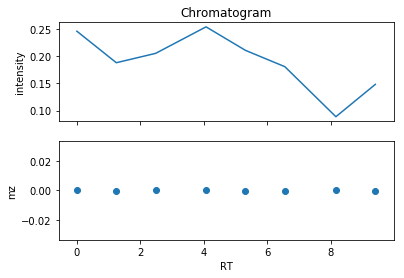

UnknownChemical mz=171.8473 rt=1210.43 max_intensity=10357527.56
[ 6913268.  8740680.  8597002. 10342004.  9123288.  8475676.  7605163.]


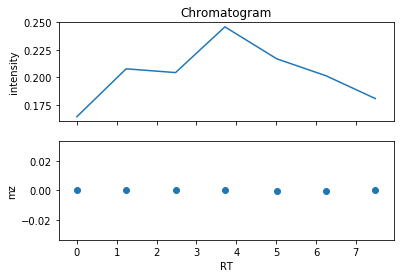

UnknownChemical mz=321.8899 rt=353.64 max_intensity=2835228.37
[ 332204.03125   1202577.5       2167776.        2596984.5
 2649260.5       2546960.        2834420.25      1339338.625
 1046288.5625     564300.3125     280551.875       90670.2890625
  294207.875       89787.65625  ]


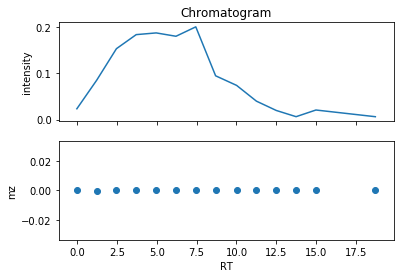

UnknownChemical mz=545.7121 rt=524.56 max_intensity=284708.37
[155684.       172994.515625 221388.671875 246788.875    255437.28125
 284723.875    263775.3125  ]


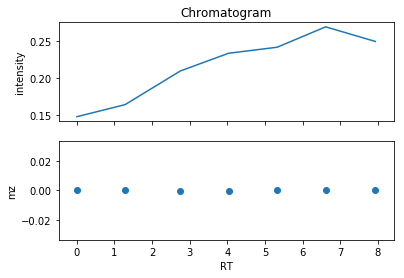

UnknownChemical mz=117.2128 rt=1168.79 max_intensity=3512900.04
[1135177.5   1550247.875 1902786.375 2970544.75  3512807.75  3459600.5
 3411918.75  2759843.25  1895270.75  1590579.    1157933.75 ]


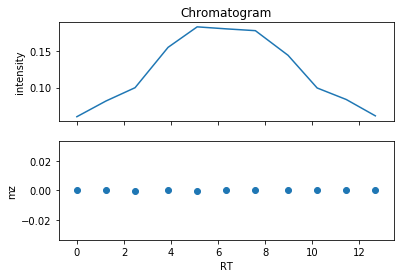

UnknownChemical mz=266.2432 rt=1097.42 max_intensity=1812430.02
[ 133325.90625   208194.859375  566812.8125    875626.0625
  891748.0625   1272819.75     1812135.375    1575298.75
 1478258.        970634.75      950615.5625    648835.6875  ]


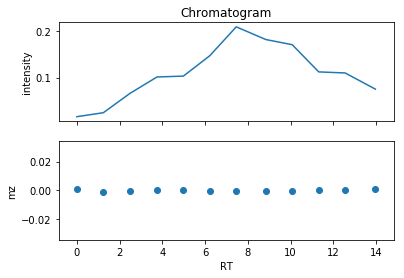

UnknownChemical mz=126.4945 rt=1249.50 max_intensity=1732821.07
[ 388890.96875     299293.21875     320441.9375      872000.4375
 1732813.5         670064.8125      259615.390625     64283.12109375
   43538.17578125]


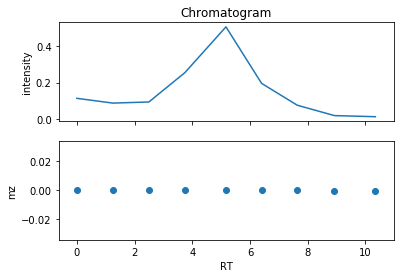

UnknownChemical mz=187.8376 rt=391.26 max_intensity=567402.66
[413528.84375 406774.875   418857.625   567376.6875  541536.25
 530714.6875  452613.34375 401142.3125 ]


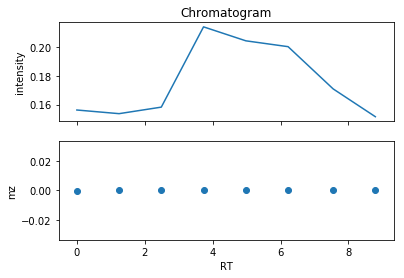

UnknownChemical mz=206.3895 rt=681.30 max_intensity=17262705.01
[ 1372622.25     1145775.875    1695580.5      1987910.75
  2156548.       2610800.75     3033774.5      3206397.5
  4037487.       7171642.       8964720.      13299492.
 14994485.      17283624.      11496917.       9782731.
  5156760.5      3231461.5      1891390.5       793552.5
   227384.03125]


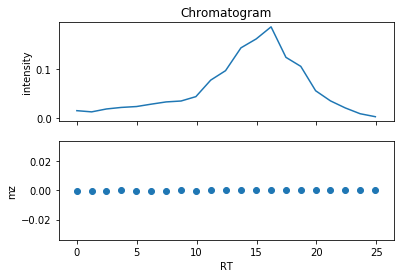

UnknownChemical mz=211.2625 rt=405.69 max_intensity=1687410.82
[ 209284.84375   73151.       182230.03125  498445.9375   729354.625
  635572.9375  1145200.5     1018433.875   1422877.5      829299.875
 1687362.875   1345812.       957302.9375   604236.6875   911292.75
  509594.15625  447582.875    537734.625    332566.09375  419727.03125]


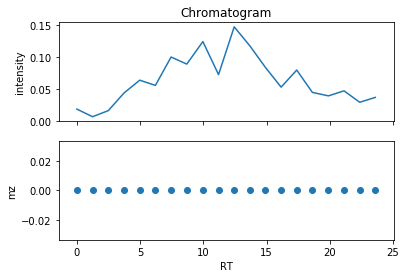

In [11]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [16]:
max_rt = 1000

In [17]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:SimpleMs1Controller:Acquisition open
INFO:SimpleMs1Controller:Received Scan 1391 num_peaks=1 rt=181.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1392 num_peaks=1 rt=181.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1393 num_peaks=1 rt=181.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1394 num_peaks=1 rt=181.38 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1395 num_peaks=1 rt=181.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1396 num_peaks=1 rt=181.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1397 num_peaks=1 rt=181.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1398 num_peaks=1 rt=181.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1399 num_peaks=1 rt=182.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1400 num_peaks=1 rt=182.15 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1401 num_peaks=2 rt=182.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1402 num_peaks=2 rt=182.56 ms_level=1
INFO:SimpleMs1Controller:Received 

INFO:SimpleMs1Controller:Received Scan 1497 num_peaks=11 rt=196.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1498 num_peaks=11 rt=197.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1499 num_peaks=11 rt=197.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1500 num_peaks=11 rt=197.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1501 num_peaks=11 rt=197.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1502 num_peaks=10 rt=197.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1503 num_peaks=10 rt=197.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1504 num_peaks=10 rt=197.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1505 num_peaks=10 rt=197.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1506 num_peaks=10 rt=198.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1507 num_peaks=10 rt=198.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1508 num_peaks=9 rt=198.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1509 num_peaks=9 rt=198.55

INFO:SimpleMs1Controller:Received Scan 1602 num_peaks=7 rt=211.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1603 num_peaks=7 rt=212.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1604 num_peaks=7 rt=212.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1605 num_peaks=6 rt=212.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1606 num_peaks=6 rt=212.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1607 num_peaks=6 rt=212.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1608 num_peaks=6 rt=212.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1609 num_peaks=6 rt=212.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1610 num_peaks=6 rt=212.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1611 num_peaks=6 rt=212.93 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1612 num_peaks=6 rt=213.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1613 num_peaks=6 rt=213.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1614 num_peaks=7 rt=213.38 ms_level=1

INFO:SimpleMs1Controller:Received Scan 1708 num_peaks=7 rt=226.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1709 num_peaks=7 rt=226.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1710 num_peaks=7 rt=226.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1711 num_peaks=7 rt=226.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1712 num_peaks=7 rt=226.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1713 num_peaks=7 rt=226.72 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1714 num_peaks=7 rt=226.84 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1715 num_peaks=7 rt=226.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1716 num_peaks=7 rt=227.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1717 num_peaks=7 rt=227.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1718 num_peaks=7 rt=227.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1719 num_peaks=7 rt=227.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1720 num_peaks=7 rt=227.71 ms_level=1

INFO:SimpleMs1Controller:Received Scan 1814 num_peaks=10 rt=238.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1815 num_peaks=10 rt=239.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1816 num_peaks=10 rt=239.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1817 num_peaks=10 rt=239.21 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1818 num_peaks=10 rt=239.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1819 num_peaks=10 rt=239.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1820 num_peaks=11 rt=239.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1821 num_peaks=11 rt=239.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1822 num_peaks=11 rt=239.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1823 num_peaks=11 rt=239.74 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1824 num_peaks=11 rt=240.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1825 num_peaks=11 rt=240.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1826 num_peaks=11 rt=240.

INFO:SimpleMs1Controller:Received Scan 1920 num_peaks=10 rt=251.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1921 num_peaks=10 rt=251.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1922 num_peaks=9 rt=251.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1923 num_peaks=9 rt=251.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1924 num_peaks=9 rt=251.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1925 num_peaks=9 rt=251.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1926 num_peaks=10 rt=251.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1927 num_peaks=11 rt=252.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1928 num_peaks=11 rt=252.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1929 num_peaks=11 rt=252.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1930 num_peaks=11 rt=252.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1931 num_peaks=11 rt=252.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1932 num_peaks=11 rt=252.91 m

INFO:SimpleMs1Controller:Received Scan 2026 num_peaks=12 rt=264.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2027 num_peaks=11 rt=264.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2028 num_peaks=11 rt=264.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2029 num_peaks=12 rt=265.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2030 num_peaks=12 rt=265.09 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2031 num_peaks=12 rt=265.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2032 num_peaks=12 rt=265.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2033 num_peaks=12 rt=265.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2034 num_peaks=13 rt=265.72 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2035 num_peaks=13 rt=265.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2036 num_peaks=13 rt=265.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2037 num_peaks=13 rt=265.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2038 num_peaks=13 rt=265.

INFO:SimpleMs1Controller:Received Scan 2132 num_peaks=10 rt=278.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2133 num_peaks=10 rt=278.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2134 num_peaks=10 rt=278.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2135 num_peaks=10 rt=278.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2136 num_peaks=10 rt=279.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2137 num_peaks=10 rt=279.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2138 num_peaks=10 rt=279.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2139 num_peaks=10 rt=279.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2140 num_peaks=10 rt=279.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2141 num_peaks=11 rt=279.65 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2142 num_peaks=11 rt=279.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2143 num_peaks=11 rt=280.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2144 num_peaks=12 rt=280.

INFO:SimpleMs1Controller:Received Scan 2238 num_peaks=17 rt=290.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2239 num_peaks=17 rt=291.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2240 num_peaks=17 rt=291.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2241 num_peaks=17 rt=291.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2242 num_peaks=17 rt=291.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2243 num_peaks=17 rt=291.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2244 num_peaks=17 rt=291.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2245 num_peaks=17 rt=291.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2246 num_peaks=17 rt=291.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2247 num_peaks=17 rt=291.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2248 num_peaks=17 rt=291.98 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2249 num_peaks=17 rt=292.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2250 num_peaks=17 rt=292.

INFO:SimpleMs1Controller:Received Scan 2344 num_peaks=19 rt=303.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2345 num_peaks=17 rt=303.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2346 num_peaks=17 rt=303.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2347 num_peaks=17 rt=303.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2348 num_peaks=17 rt=303.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2349 num_peaks=17 rt=303.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2350 num_peaks=17 rt=303.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2351 num_peaks=16 rt=304.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2352 num_peaks=16 rt=304.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2353 num_peaks=16 rt=304.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2354 num_peaks=16 rt=304.51 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2355 num_peaks=16 rt=304.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2356 num_peaks=16 rt=304.

INFO:SimpleMs1Controller:Received Scan 2450 num_peaks=17 rt=316.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2451 num_peaks=17 rt=316.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2452 num_peaks=17 rt=316.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2453 num_peaks=17 rt=316.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2454 num_peaks=17 rt=316.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2455 num_peaks=17 rt=317.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2456 num_peaks=17 rt=317.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2457 num_peaks=17 rt=317.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2458 num_peaks=17 rt=317.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2459 num_peaks=17 rt=317.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2460 num_peaks=17 rt=317.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2461 num_peaks=18 rt=317.89 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2462 num_peaks=18 rt=317.

INFO:SimpleMs1Controller:Received Scan 2556 num_peaks=13 rt=330.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2557 num_peaks=13 rt=330.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2558 num_peaks=13 rt=330.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2559 num_peaks=13 rt=331.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2560 num_peaks=13 rt=331.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2561 num_peaks=13 rt=331.62 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2562 num_peaks=13 rt=331.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2563 num_peaks=13 rt=331.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2564 num_peaks=14 rt=331.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2565 num_peaks=14 rt=332.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2566 num_peaks=14 rt=332.09 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2567 num_peaks=14 rt=332.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2568 num_peaks=14 rt=332.

INFO:SimpleMs1Controller:Received Scan 2662 num_peaks=21 rt=342.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2663 num_peaks=21 rt=342.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2664 num_peaks=20 rt=343.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2665 num_peaks=20 rt=343.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2666 num_peaks=20 rt=343.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2667 num_peaks=20 rt=343.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2668 num_peaks=20 rt=343.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2669 num_peaks=20 rt=343.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2670 num_peaks=20 rt=343.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2671 num_peaks=20 rt=343.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2672 num_peaks=20 rt=343.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2673 num_peaks=20 rt=343.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2674 num_peaks=20 rt=344.

INFO:SimpleMs1Controller:Received Scan 2768 num_peaks=23 rt=356.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2769 num_peaks=23 rt=356.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2770 num_peaks=23 rt=356.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2771 num_peaks=25 rt=356.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2772 num_peaks=25 rt=356.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2773 num_peaks=25 rt=356.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2774 num_peaks=24 rt=357.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2775 num_peaks=24 rt=357.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2776 num_peaks=24 rt=357.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2777 num_peaks=23 rt=357.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2778 num_peaks=23 rt=357.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2779 num_peaks=24 rt=357.65 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2780 num_peaks=24 rt=357.

INFO:SimpleMs1Controller:Received Scan 2874 num_peaks=23 rt=369.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2875 num_peaks=23 rt=369.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2876 num_peaks=24 rt=370.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2877 num_peaks=24 rt=370.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2878 num_peaks=24 rt=370.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2879 num_peaks=24 rt=370.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2880 num_peaks=27 rt=370.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2881 num_peaks=27 rt=371.21 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2882 num_peaks=27 rt=371.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2883 num_peaks=27 rt=371.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2884 num_peaks=26 rt=371.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2885 num_peaks=26 rt=371.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2886 num_peaks=25 rt=372.

INFO:SimpleMs1Controller:Received Scan 2980 num_peaks=30 rt=385.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2981 num_peaks=30 rt=385.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2982 num_peaks=30 rt=385.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2983 num_peaks=29 rt=385.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2984 num_peaks=29 rt=385.72 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2985 num_peaks=29 rt=385.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2986 num_peaks=29 rt=385.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2987 num_peaks=28 rt=386.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2988 num_peaks=28 rt=386.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2989 num_peaks=28 rt=386.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2990 num_peaks=29 rt=386.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2991 num_peaks=30 rt=386.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 2992 num_peaks=29 rt=386.

INFO:SimpleMs1Controller:Received Scan 3086 num_peaks=27 rt=398.51 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3087 num_peaks=27 rt=398.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3088 num_peaks=27 rt=398.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3089 num_peaks=27 rt=398.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3090 num_peaks=27 rt=398.90 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3091 num_peaks=27 rt=398.98 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3092 num_peaks=27 rt=399.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3093 num_peaks=27 rt=399.53 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3094 num_peaks=27 rt=399.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3095 num_peaks=27 rt=399.71 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3096 num_peaks=27 rt=399.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3097 num_peaks=25 rt=400.06 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3098 num_peaks=25 rt=400.

INFO:SimpleMs1Controller:Received Scan 3192 num_peaks=23 rt=413.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3193 num_peaks=23 rt=413.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3194 num_peaks=23 rt=413.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3195 num_peaks=22 rt=414.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3196 num_peaks=22 rt=414.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3197 num_peaks=22 rt=414.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3198 num_peaks=22 rt=414.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3199 num_peaks=22 rt=414.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3200 num_peaks=22 rt=414.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3201 num_peaks=22 rt=415.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3202 num_peaks=22 rt=415.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3203 num_peaks=22 rt=415.22 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3204 num_peaks=22 rt=415.

INFO:SimpleMs1Controller:Received Scan 3298 num_peaks=27 rt=427.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3299 num_peaks=27 rt=427.22 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3300 num_peaks=27 rt=427.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3301 num_peaks=27 rt=427.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3302 num_peaks=27 rt=427.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3303 num_peaks=27 rt=427.65 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3304 num_peaks=27 rt=427.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3305 num_peaks=27 rt=427.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3306 num_peaks=27 rt=428.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3307 num_peaks=27 rt=428.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3308 num_peaks=28 rt=428.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3309 num_peaks=26 rt=428.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3310 num_peaks=26 rt=428.

INFO:SimpleMs1Controller:Received Scan 3404 num_peaks=19 rt=440.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3405 num_peaks=19 rt=440.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3406 num_peaks=19 rt=440.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3407 num_peaks=18 rt=441.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3408 num_peaks=17 rt=441.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3409 num_peaks=17 rt=441.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3410 num_peaks=17 rt=441.51 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3411 num_peaks=17 rt=441.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3412 num_peaks=17 rt=441.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3413 num_peaks=17 rt=441.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3414 num_peaks=16 rt=442.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3415 num_peaks=16 rt=442.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3416 num_peaks=16 rt=442.

INFO:SimpleMs1Controller:Received Scan 3510 num_peaks=17 rt=454.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3511 num_peaks=16 rt=454.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3512 num_peaks=15 rt=454.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3513 num_peaks=15 rt=455.00 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3514 num_peaks=15 rt=455.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3515 num_peaks=15 rt=455.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3516 num_peaks=15 rt=455.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3517 num_peaks=15 rt=455.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3518 num_peaks=15 rt=455.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3519 num_peaks=15 rt=455.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3520 num_peaks=15 rt=455.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3521 num_peaks=15 rt=455.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3522 num_peaks=15 rt=455.

INFO:SimpleMs1Controller:Received Scan 3616 num_peaks=14 rt=467.74 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3617 num_peaks=16 rt=468.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3618 num_peaks=16 rt=468.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3619 num_peaks=16 rt=468.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3620 num_peaks=16 rt=468.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3621 num_peaks=16 rt=468.53 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3622 num_peaks=16 rt=468.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3623 num_peaks=16 rt=468.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3624 num_peaks=16 rt=468.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3625 num_peaks=16 rt=468.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3626 num_peaks=16 rt=468.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3627 num_peaks=16 rt=469.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3628 num_peaks=16 rt=469.

INFO:SimpleMs1Controller:Received Scan 3722 num_peaks=14 rt=483.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3723 num_peaks=14 rt=483.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3724 num_peaks=15 rt=483.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3725 num_peaks=15 rt=483.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3726 num_peaks=15 rt=483.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3727 num_peaks=15 rt=483.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3728 num_peaks=15 rt=484.00 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3729 num_peaks=15 rt=484.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3730 num_peaks=14 rt=484.15 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3731 num_peaks=15 rt=484.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3732 num_peaks=15 rt=484.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3733 num_peaks=15 rt=484.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3734 num_peaks=14 rt=484.

INFO:SimpleMs1Controller:Received Scan 3827 num_peaks=22 rt=495.90 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3828 num_peaks=22 rt=496.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3829 num_peaks=21 rt=496.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3830 num_peaks=21 rt=496.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3831 num_peaks=21 rt=496.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3832 num_peaks=22 rt=496.84 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3833 num_peaks=22 rt=496.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3834 num_peaks=22 rt=497.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3835 num_peaks=23 rt=497.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3836 num_peaks=23 rt=497.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3837 num_peaks=22 rt=497.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3838 num_peaks=22 rt=497.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3839 num_peaks=22 rt=497.

INFO:SimpleMs1Controller:Received Scan 3933 num_peaks=19 rt=510.62 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3934 num_peaks=19 rt=510.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3935 num_peaks=21 rt=510.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3936 num_peaks=21 rt=510.90 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3937 num_peaks=21 rt=510.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3938 num_peaks=23 rt=511.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3939 num_peaks=24 rt=511.71 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3940 num_peaks=24 rt=511.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3941 num_peaks=24 rt=511.90 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3942 num_peaks=24 rt=512.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3943 num_peaks=24 rt=512.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3944 num_peaks=24 rt=512.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 3945 num_peaks=24 rt=512.

INFO:SimpleMs1Controller:Received Scan 4039 num_peaks=19 rt=524.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4040 num_peaks=19 rt=524.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4041 num_peaks=19 rt=524.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4042 num_peaks=19 rt=525.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4043 num_peaks=18 rt=525.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4044 num_peaks=17 rt=525.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4045 num_peaks=17 rt=525.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4046 num_peaks=17 rt=526.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4047 num_peaks=17 rt=526.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4048 num_peaks=17 rt=526.38 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4049 num_peaks=17 rt=526.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4050 num_peaks=17 rt=526.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4051 num_peaks=17 rt=526.

INFO:SimpleMs1Controller:Received Scan 4145 num_peaks=12 rt=538.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4146 num_peaks=12 rt=538.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4147 num_peaks=12 rt=538.75 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4148 num_peaks=13 rt=539.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4149 num_peaks=13 rt=539.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4150 num_peaks=13 rt=539.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4151 num_peaks=13 rt=539.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4152 num_peaks=13 rt=539.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4153 num_peaks=13 rt=539.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4154 num_peaks=13 rt=540.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4155 num_peaks=13 rt=540.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4156 num_peaks=13 rt=540.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4157 num_peaks=13 rt=540.

INFO:SimpleMs1Controller:Received Scan 4251 num_peaks=19 rt=552.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4252 num_peaks=19 rt=552.22 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4253 num_peaks=19 rt=552.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4254 num_peaks=19 rt=552.37 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4255 num_peaks=19 rt=552.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4256 num_peaks=19 rt=552.51 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4257 num_peaks=19 rt=552.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4258 num_peaks=19 rt=552.93 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4259 num_peaks=19 rt=553.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4260 num_peaks=19 rt=553.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4261 num_peaks=20 rt=553.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4262 num_peaks=20 rt=553.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4263 num_peaks=22 rt=553.

INFO:SimpleMs1Controller:Received Scan 4357 num_peaks=11 rt=565.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4358 num_peaks=12 rt=565.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4359 num_peaks=12 rt=565.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4360 num_peaks=12 rt=565.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4361 num_peaks=12 rt=565.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4362 num_peaks=12 rt=565.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4363 num_peaks=12 rt=565.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4364 num_peaks=12 rt=566.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4365 num_peaks=12 rt=566.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4366 num_peaks=13 rt=566.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4367 num_peaks=13 rt=566.75 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4368 num_peaks=13 rt=566.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4369 num_peaks=13 rt=566.

INFO:SimpleMs1Controller:Received Scan 4463 num_peaks=17 rt=578.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4464 num_peaks=17 rt=578.37 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4465 num_peaks=17 rt=578.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4466 num_peaks=17 rt=578.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4467 num_peaks=17 rt=578.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4468 num_peaks=17 rt=578.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4469 num_peaks=17 rt=578.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4470 num_peaks=16 rt=579.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4471 num_peaks=16 rt=579.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4472 num_peaks=16 rt=579.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4473 num_peaks=16 rt=579.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4474 num_peaks=16 rt=579.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4475 num_peaks=15 rt=579.

INFO:SimpleMs1Controller:Received Scan 4568 num_peaks=11 rt=591.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4569 num_peaks=11 rt=591.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4570 num_peaks=11 rt=591.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4571 num_peaks=12 rt=591.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4572 num_peaks=12 rt=591.84 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4573 num_peaks=12 rt=591.93 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4574 num_peaks=12 rt=592.00 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4575 num_peaks=12 rt=592.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4576 num_peaks=12 rt=592.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4577 num_peaks=12 rt=592.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4578 num_peaks=12 rt=592.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4579 num_peaks=12 rt=592.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4580 num_peaks=12 rt=592.

INFO:SimpleMs1Controller:Received Scan 4674 num_peaks=14 rt=605.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4675 num_peaks=14 rt=605.53 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4676 num_peaks=13 rt=605.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4677 num_peaks=13 rt=605.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4678 num_peaks=13 rt=606.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4679 num_peaks=13 rt=606.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4680 num_peaks=13 rt=606.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4681 num_peaks=12 rt=606.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4682 num_peaks=12 rt=606.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4683 num_peaks=13 rt=606.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4684 num_peaks=13 rt=606.93 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4685 num_peaks=12 rt=607.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4686 num_peaks=12 rt=607.

INFO:SimpleMs1Controller:Received Scan 4780 num_peaks=12 rt=618.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4781 num_peaks=12 rt=618.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4782 num_peaks=12 rt=619.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4783 num_peaks=13 rt=619.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4784 num_peaks=13 rt=619.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4785 num_peaks=13 rt=619.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4786 num_peaks=12 rt=619.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4787 num_peaks=12 rt=619.59 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4788 num_peaks=12 rt=619.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4789 num_peaks=11 rt=620.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4790 num_peaks=14 rt=620.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4791 num_peaks=14 rt=620.72 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4792 num_peaks=14 rt=620.

INFO:SimpleMs1Controller:Received Scan 4886 num_peaks=14 rt=632.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4887 num_peaks=14 rt=632.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4888 num_peaks=14 rt=632.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4889 num_peaks=14 rt=632.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4890 num_peaks=14 rt=632.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4891 num_peaks=14 rt=632.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4892 num_peaks=14 rt=633.09 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4893 num_peaks=15 rt=633.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4894 num_peaks=16 rt=633.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4895 num_peaks=16 rt=633.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4896 num_peaks=16 rt=633.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4897 num_peaks=16 rt=634.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4898 num_peaks=16 rt=634.

INFO:SimpleMs1Controller:Received Scan 4992 num_peaks=13 rt=646.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4993 num_peaks=13 rt=647.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4994 num_peaks=13 rt=647.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4995 num_peaks=13 rt=647.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4996 num_peaks=13 rt=647.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4997 num_peaks=12 rt=647.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4998 num_peaks=12 rt=647.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 4999 num_peaks=12 rt=647.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5000 num_peaks=13 rt=647.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5001 num_peaks=13 rt=647.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5002 num_peaks=13 rt=647.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5003 num_peaks=13 rt=648.23 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5004 num_peaks=12 rt=648.

INFO:SimpleMs1Controller:Received Scan 5098 num_peaks=15 rt=659.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5099 num_peaks=15 rt=660.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5100 num_peaks=15 rt=660.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5101 num_peaks=15 rt=660.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5102 num_peaks=15 rt=660.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5103 num_peaks=14 rt=660.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5104 num_peaks=14 rt=660.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5105 num_peaks=15 rt=660.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5106 num_peaks=15 rt=660.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5107 num_peaks=15 rt=661.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5108 num_peaks=15 rt=661.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5109 num_peaks=14 rt=661.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5110 num_peaks=14 rt=661.

INFO:SimpleMs1Controller:Received Scan 5204 num_peaks=16 rt=673.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5205 num_peaks=16 rt=673.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5206 num_peaks=16 rt=673.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5207 num_peaks=16 rt=673.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5208 num_peaks=16 rt=673.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5209 num_peaks=17 rt=673.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5210 num_peaks=17 rt=674.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5211 num_peaks=17 rt=674.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5212 num_peaks=16 rt=674.74 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5213 num_peaks=16 rt=674.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5214 num_peaks=16 rt=675.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5215 num_peaks=17 rt=675.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5216 num_peaks=17 rt=675.

INFO:SimpleMs1Controller:Received Scan 5310 num_peaks=22 rt=688.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5311 num_peaks=22 rt=688.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5312 num_peaks=22 rt=688.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5313 num_peaks=23 rt=688.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5314 num_peaks=23 rt=688.53 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5315 num_peaks=23 rt=688.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5316 num_peaks=23 rt=688.74 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5317 num_peaks=23 rt=688.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5318 num_peaks=25 rt=689.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5319 num_peaks=25 rt=689.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5320 num_peaks=25 rt=689.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5321 num_peaks=26 rt=689.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5322 num_peaks=26 rt=689.

INFO:SimpleMs1Controller:Received Scan 5416 num_peaks=24 rt=701.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5417 num_peaks=24 rt=701.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5418 num_peaks=24 rt=702.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5419 num_peaks=23 rt=702.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5420 num_peaks=23 rt=702.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5421 num_peaks=22 rt=702.62 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5422 num_peaks=22 rt=702.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5423 num_peaks=22 rt=702.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5424 num_peaks=22 rt=702.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5425 num_peaks=22 rt=702.98 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5426 num_peaks=22 rt=703.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5427 num_peaks=23 rt=703.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5428 num_peaks=23 rt=703.

INFO:SimpleMs1Controller:Received Scan 5522 num_peaks=24 rt=715.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5523 num_peaks=24 rt=715.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5524 num_peaks=24 rt=715.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5525 num_peaks=24 rt=715.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5526 num_peaks=24 rt=715.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5527 num_peaks=21 rt=715.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5528 num_peaks=21 rt=715.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5529 num_peaks=21 rt=716.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5530 num_peaks=21 rt=716.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5531 num_peaks=21 rt=716.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5532 num_peaks=21 rt=716.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5533 num_peaks=21 rt=716.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5534 num_peaks=22 rt=716.

INFO:SimpleMs1Controller:Received Scan 5628 num_peaks=14 rt=727.31 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5629 num_peaks=14 rt=727.38 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5630 num_peaks=14 rt=727.55 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5631 num_peaks=14 rt=727.71 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5632 num_peaks=14 rt=727.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5633 num_peaks=15 rt=727.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5634 num_peaks=15 rt=727.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5635 num_peaks=15 rt=728.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5636 num_peaks=15 rt=728.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5637 num_peaks=15 rt=728.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5638 num_peaks=15 rt=728.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5639 num_peaks=15 rt=728.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5640 num_peaks=15 rt=728.

INFO:SimpleMs1Controller:Received Scan 5734 num_peaks=17 rt=741.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5735 num_peaks=17 rt=741.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5736 num_peaks=16 rt=741.89 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5737 num_peaks=16 rt=742.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5738 num_peaks=16 rt=742.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5739 num_peaks=16 rt=742.15 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5740 num_peaks=16 rt=742.21 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5741 num_peaks=16 rt=742.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5742 num_peaks=16 rt=742.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5743 num_peaks=17 rt=742.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5744 num_peaks=17 rt=742.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5745 num_peaks=17 rt=742.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5746 num_peaks=17 rt=743.

INFO:SimpleMs1Controller:Received Scan 5840 num_peaks=16 rt=755.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5841 num_peaks=16 rt=755.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5842 num_peaks=15 rt=755.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5843 num_peaks=15 rt=755.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5844 num_peaks=15 rt=756.00 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5845 num_peaks=16 rt=756.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5846 num_peaks=16 rt=756.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5847 num_peaks=16 rt=756.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5848 num_peaks=17 rt=756.37 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5849 num_peaks=17 rt=756.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5850 num_peaks=17 rt=756.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5851 num_peaks=18 rt=756.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5852 num_peaks=18 rt=756.

INFO:SimpleMs1Controller:Received Scan 5946 num_peaks=18 rt=769.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5947 num_peaks=18 rt=769.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5948 num_peaks=18 rt=769.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5949 num_peaks=18 rt=769.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5950 num_peaks=18 rt=769.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5951 num_peaks=18 rt=769.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5952 num_peaks=18 rt=769.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5953 num_peaks=18 rt=769.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5954 num_peaks=18 rt=770.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5955 num_peaks=18 rt=770.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5956 num_peaks=19 rt=770.21 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5957 num_peaks=19 rt=770.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 5958 num_peaks=19 rt=770.

INFO:SimpleMs1Controller:Received Scan 6052 num_peaks=20 rt=782.09 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6053 num_peaks=21 rt=782.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6054 num_peaks=21 rt=782.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6055 num_peaks=21 rt=782.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6056 num_peaks=21 rt=782.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6057 num_peaks=21 rt=782.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6058 num_peaks=21 rt=782.66 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6059 num_peaks=19 rt=782.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6060 num_peaks=19 rt=782.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6061 num_peaks=19 rt=783.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6062 num_peaks=19 rt=783.25 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6063 num_peaks=19 rt=783.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6064 num_peaks=20 rt=783.

INFO:SimpleMs1Controller:Received Scan 6158 num_peaks=22 rt=796.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6159 num_peaks=22 rt=796.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6160 num_peaks=22 rt=796.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6161 num_peaks=22 rt=796.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6162 num_peaks=21 rt=796.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6163 num_peaks=21 rt=796.65 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6164 num_peaks=21 rt=796.75 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6165 num_peaks=21 rt=796.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6166 num_peaks=21 rt=796.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6167 num_peaks=21 rt=797.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6168 num_peaks=21 rt=797.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6169 num_peaks=22 rt=797.29 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6170 num_peaks=21 rt=797.

INFO:SimpleMs1Controller:Received Scan 6264 num_peaks=15 rt=808.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6265 num_peaks=15 rt=808.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6266 num_peaks=15 rt=809.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6267 num_peaks=15 rt=809.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6268 num_peaks=15 rt=809.36 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6269 num_peaks=15 rt=809.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6270 num_peaks=15 rt=809.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6271 num_peaks=15 rt=809.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6272 num_peaks=16 rt=809.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6273 num_peaks=16 rt=809.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6274 num_peaks=16 rt=810.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6275 num_peaks=16 rt=810.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6276 num_peaks=16 rt=810.

INFO:SimpleMs1Controller:Received Scan 6370 num_peaks=13 rt=822.55 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6371 num_peaks=13 rt=822.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6372 num_peaks=13 rt=822.76 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6373 num_peaks=13 rt=822.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6374 num_peaks=13 rt=822.98 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6375 num_peaks=13 rt=823.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6376 num_peaks=11 rt=823.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6377 num_peaks=11 rt=823.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6378 num_peaks=11 rt=823.55 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6379 num_peaks=11 rt=823.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6380 num_peaks=11 rt=823.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6381 num_peaks=11 rt=823.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6382 num_peaks=11 rt=824.

INFO:SimpleMs1Controller:Received Scan 6476 num_peaks=14 rt=835.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6477 num_peaks=14 rt=835.15 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6478 num_peaks=14 rt=835.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6479 num_peaks=14 rt=835.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6480 num_peaks=14 rt=835.48 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6481 num_peaks=14 rt=835.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6482 num_peaks=14 rt=835.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6483 num_peaks=14 rt=835.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6484 num_peaks=14 rt=836.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6485 num_peaks=13 rt=836.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6486 num_peaks=13 rt=836.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6487 num_peaks=13 rt=836.65 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6488 num_peaks=12 rt=837.

INFO:SimpleMs1Controller:Received Scan 6582 num_peaks=9 rt=848.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6583 num_peaks=9 rt=848.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6584 num_peaks=9 rt=848.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6585 num_peaks=9 rt=848.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6586 num_peaks=10 rt=848.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6587 num_peaks=10 rt=848.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6588 num_peaks=10 rt=848.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6589 num_peaks=10 rt=848.71 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6590 num_peaks=10 rt=848.89 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6591 num_peaks=10 rt=849.05 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6592 num_peaks=10 rt=849.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6593 num_peaks=11 rt=849.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6594 num_peaks=11 rt=849.87 m

INFO:SimpleMs1Controller:Received Scan 6688 num_peaks=12 rt=861.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6689 num_peaks=12 rt=861.88 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6690 num_peaks=12 rt=862.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6691 num_peaks=12 rt=862.10 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6692 num_peaks=12 rt=862.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6693 num_peaks=12 rt=862.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6694 num_peaks=12 rt=862.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6695 num_peaks=12 rt=862.69 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6696 num_peaks=12 rt=862.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6697 num_peaks=12 rt=862.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6698 num_peaks=12 rt=863.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6699 num_peaks=12 rt=863.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6700 num_peaks=12 rt=863.

INFO:SimpleMs1Controller:Received Scan 6794 num_peaks=19 rt=875.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6795 num_peaks=18 rt=875.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6796 num_peaks=18 rt=875.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6797 num_peaks=19 rt=876.12 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6798 num_peaks=19 rt=876.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6799 num_peaks=19 rt=876.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6800 num_peaks=19 rt=876.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6801 num_peaks=19 rt=876.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6802 num_peaks=19 rt=876.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6803 num_peaks=17 rt=876.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6804 num_peaks=17 rt=876.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6805 num_peaks=17 rt=877.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6806 num_peaks=17 rt=877.

INFO:SimpleMs1Controller:Received Scan 6900 num_peaks=13 rt=889.38 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6901 num_peaks=13 rt=889.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6902 num_peaks=13 rt=889.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6903 num_peaks=13 rt=889.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6904 num_peaks=14 rt=889.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6905 num_peaks=14 rt=889.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6906 num_peaks=14 rt=890.07 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6907 num_peaks=14 rt=890.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6908 num_peaks=14 rt=890.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6909 num_peaks=15 rt=890.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6910 num_peaks=15 rt=890.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6911 num_peaks=16 rt=890.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 6912 num_peaks=16 rt=890.

INFO:SimpleMs1Controller:Received Scan 7006 num_peaks=15 rt=903.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7007 num_peaks=15 rt=903.57 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7008 num_peaks=15 rt=903.83 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7009 num_peaks=15 rt=903.91 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7010 num_peaks=15 rt=904.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7011 num_peaks=16 rt=904.14 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7012 num_peaks=16 rt=904.22 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7013 num_peaks=17 rt=904.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7014 num_peaks=17 rt=904.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7015 num_peaks=17 rt=904.52 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7016 num_peaks=17 rt=904.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7017 num_peaks=17 rt=904.67 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7018 num_peaks=17 rt=904.

INFO:SimpleMs1Controller:Received Scan 7111 num_peaks=21 rt=915.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7112 num_peaks=22 rt=915.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7113 num_peaks=22 rt=915.55 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7114 num_peaks=22 rt=915.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7115 num_peaks=22 rt=915.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7116 num_peaks=22 rt=915.90 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7117 num_peaks=22 rt=916.08 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7118 num_peaks=22 rt=916.16 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7119 num_peaks=22 rt=916.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7120 num_peaks=22 rt=916.43 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7121 num_peaks=22 rt=916.49 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7122 num_peaks=22 rt=916.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7123 num_peaks=20 rt=916.

INFO:SimpleMs1Controller:Received Scan 7217 num_peaks=15 rt=928.37 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7218 num_peaks=15 rt=928.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7219 num_peaks=15 rt=928.53 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7220 num_peaks=14 rt=928.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7221 num_peaks=14 rt=928.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7222 num_peaks=14 rt=929.03 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7223 num_peaks=14 rt=929.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7224 num_peaks=14 rt=929.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7225 num_peaks=14 rt=929.33 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7226 num_peaks=13 rt=929.50 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7227 num_peaks=13 rt=929.58 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7228 num_peaks=14 rt=929.75 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7229 num_peaks=14 rt=929.

INFO:SimpleMs1Controller:Received Scan 7323 num_peaks=13 rt=942.13 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7324 num_peaks=12 rt=942.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7325 num_peaks=12 rt=942.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7326 num_peaks=12 rt=942.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7327 num_peaks=12 rt=942.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7328 num_peaks=12 rt=942.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7329 num_peaks=12 rt=942.95 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7330 num_peaks=12 rt=943.02 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7331 num_peaks=12 rt=943.09 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7332 num_peaks=12 rt=943.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7333 num_peaks=12 rt=943.22 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7334 num_peaks=12 rt=943.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7335 num_peaks=12 rt=943.

INFO:SimpleMs1Controller:Received Scan 7429 num_peaks=19 rt=955.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7430 num_peaks=18 rt=955.28 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7431 num_peaks=17 rt=955.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7432 num_peaks=17 rt=955.42 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7433 num_peaks=17 rt=955.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7434 num_peaks=17 rt=955.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7435 num_peaks=17 rt=955.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7436 num_peaks=17 rt=955.81 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7437 num_peaks=17 rt=956.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7438 num_peaks=17 rt=956.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7439 num_peaks=18 rt=956.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7440 num_peaks=18 rt=956.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7441 num_peaks=18 rt=956.

INFO:SimpleMs1Controller:Received Scan 7535 num_peaks=19 rt=968.27 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7536 num_peaks=19 rt=968.39 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7537 num_peaks=19 rt=968.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7538 num_peaks=19 rt=968.55 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7539 num_peaks=19 rt=968.61 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7540 num_peaks=19 rt=968.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7541 num_peaks=19 rt=969.06 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7542 num_peaks=19 rt=969.19 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7543 num_peaks=18 rt=969.26 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7544 num_peaks=17 rt=969.40 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7545 num_peaks=16 rt=969.47 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7546 num_peaks=16 rt=969.74 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7547 num_peaks=15 rt=969.

INFO:SimpleMs1Controller:Received Scan 7641 num_peaks=15 rt=981.20 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7642 num_peaks=15 rt=981.46 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7643 num_peaks=15 rt=981.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7644 num_peaks=14 rt=981.60 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7645 num_peaks=14 rt=981.77 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7646 num_peaks=14 rt=981.85 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7647 num_peaks=14 rt=981.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7648 num_peaks=14 rt=981.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7649 num_peaks=14 rt=982.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7650 num_peaks=14 rt=982.17 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7651 num_peaks=14 rt=982.35 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7652 num_peaks=14 rt=982.51 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7653 num_peaks=14 rt=982.

INFO:SimpleMs1Controller:Received Scan 7747 num_peaks=17 rt=994.82 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7748 num_peaks=17 rt=994.96 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7749 num_peaks=17 rt=995.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7750 num_peaks=17 rt=995.30 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7751 num_peaks=17 rt=995.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7752 num_peaks=17 rt=995.63 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7753 num_peaks=17 rt=995.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7754 num_peaks=17 rt=995.78 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7755 num_peaks=17 rt=995.86 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7756 num_peaks=17 rt=995.92 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7757 num_peaks=17 rt=995.99 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7758 num_peaks=17 rt=996.06 ms_level=1
INFO:SimpleMs1Controller:Received Scan 7759 num_peaks=17 rt=996.

In [18]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a Top-N controller

In [19]:
max_rt = 1000                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [23]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:TopNController:Acquisition open
INFO:TopNController:Received Scan 1418 num_peaks=1 rt=181.10 ms_level=1
INFO:TopNController:Received Scan 1419 num_peaks=10 rt=181.16 ms_level=2
INFO:TopNController:Received Scan 1420 num_peaks=1 rt=181.31 ms_level=1
INFO:TopNController:Received Scan 1421 num_peaks=1 rt=181.37 ms_level=1
INFO:TopNController:Received Scan 1422 num_peaks=1 rt=181.74 ms_level=1
INFO:TopNController:Received Scan 1423 num_peaks=1 rt=182.10 ms_level=1
INFO:TopNController:Received Scan 1424 num_peaks=1 rt=182.17 ms_level=1
INFO:TopNController:Received Scan 1425 num_peaks=1 rt=182.25 ms_level=1
INFO:TopNController:Received Scan 1426 num_peaks=2 rt=182.51 ms_level=1
INFO:TopNController:Received Scan 1427 num_peaks=10 rt=182.57 ms_level=2
INFO:TopNController:Received Scan 1428 num_peaks=2 rt=182.72 ms_level=1
INFO:TopNController:Received Scan 1429 num_peaks=2 rt=182.79 ms_level=1
INFO:TopNController:Received Scan 1430 num_peaks=2 rt=182.91 ms_level=1
INFO:TopNController:Recei

INFO:TopNController:Received Scan 1531 num_peaks=11 rt=196.34 ms_level=1
INFO:TopNController:Received Scan 1532 num_peaks=10 rt=196.40 ms_level=2
INFO:TopNController:Received Scan 1533 num_peaks=11 rt=196.54 ms_level=1
INFO:TopNController:Received Scan 1534 num_peaks=11 rt=196.61 ms_level=1
INFO:TopNController:Received Scan 1535 num_peaks=11 rt=196.66 ms_level=1
INFO:TopNController:Received Scan 1536 num_peaks=11 rt=196.78 ms_level=1
INFO:TopNController:Received Scan 1537 num_peaks=11 rt=196.86 ms_level=1
INFO:TopNController:Received Scan 1538 num_peaks=11 rt=197.00 ms_level=1
INFO:TopNController:Received Scan 1539 num_peaks=11 rt=197.27 ms_level=1
INFO:TopNController:Received Scan 1540 num_peaks=11 rt=197.36 ms_level=1
INFO:TopNController:Received Scan 1541 num_peaks=11 rt=197.52 ms_level=1
INFO:TopNController:Received Scan 1542 num_peaks=10 rt=197.59 ms_level=1
INFO:TopNController:Received Scan 1543 num_peaks=10 rt=197.65 ms_level=1
INFO:TopNController:Received Scan 1544 num_peaks=10

INFO:TopNController:Received Scan 1644 num_peaks=8 rt=211.17 ms_level=1
INFO:TopNController:Received Scan 1645 num_peaks=7 rt=211.26 ms_level=1
INFO:TopNController:Received Scan 1646 num_peaks=7 rt=211.34 ms_level=1
INFO:TopNController:Received Scan 1647 num_peaks=7 rt=211.40 ms_level=1
INFO:TopNController:Received Scan 1648 num_peaks=7 rt=211.57 ms_level=1
INFO:TopNController:Received Scan 1649 num_peaks=7 rt=211.83 ms_level=1
INFO:TopNController:Received Scan 1650 num_peaks=7 rt=212.03 ms_level=1
INFO:TopNController:Received Scan 1651 num_peaks=7 rt=212.12 ms_level=1
INFO:TopNController:Received Scan 1652 num_peaks=7 rt=212.20 ms_level=1
INFO:TopNController:Received Scan 1653 num_peaks=6 rt=212.31 ms_level=1
INFO:TopNController:Received Scan 1654 num_peaks=10 rt=212.44 ms_level=2
INFO:TopNController:Received Scan 1655 num_peaks=6 rt=212.71 ms_level=1
INFO:TopNController:Received Scan 1656 num_peaks=6 rt=212.83 ms_level=1
INFO:TopNController:Received Scan 1657 num_peaks=6 rt=212.91 ms

INFO:TopNController:Received Scan 1758 num_peaks=7 rt=226.31 ms_level=1
INFO:TopNController:Received Scan 1759 num_peaks=7 rt=226.38 ms_level=1
INFO:TopNController:Received Scan 1760 num_peaks=7 rt=226.71 ms_level=1
INFO:TopNController:Received Scan 1761 num_peaks=7 rt=226.77 ms_level=1
INFO:TopNController:Received Scan 1762 num_peaks=7 rt=226.85 ms_level=1
INFO:TopNController:Received Scan 1763 num_peaks=7 rt=226.96 ms_level=1
INFO:TopNController:Received Scan 1764 num_peaks=7 rt=227.08 ms_level=1
INFO:TopNController:Received Scan 1765 num_peaks=7 rt=227.16 ms_level=1
INFO:TopNController:Received Scan 1766 num_peaks=7 rt=227.25 ms_level=1
INFO:TopNController:Received Scan 1767 num_peaks=7 rt=227.43 ms_level=1
INFO:TopNController:Received Scan 1768 num_peaks=7 rt=227.51 ms_level=1
INFO:TopNController:Received Scan 1769 num_peaks=7 rt=227.59 ms_level=1
INFO:TopNController:Received Scan 1770 num_peaks=7 rt=227.96 ms_level=1
INFO:TopNController:Received Scan 1771 num_peaks=7 rt=228.12 ms_

INFO:TopNController:Received Scan 1871 num_peaks=10 rt=242.36 ms_level=1
INFO:TopNController:Received Scan 1872 num_peaks=10 rt=242.45 ms_level=1
INFO:TopNController:Received Scan 1873 num_peaks=9 rt=242.59 ms_level=1
INFO:TopNController:Received Scan 1874 num_peaks=9 rt=242.69 ms_level=1
INFO:TopNController:Received Scan 1875 num_peaks=10 rt=243.01 ms_level=2
INFO:TopNController:Received Scan 1876 num_peaks=9 rt=243.16 ms_level=1
INFO:TopNController:Received Scan 1877 num_peaks=9 rt=243.21 ms_level=1
INFO:TopNController:Received Scan 1878 num_peaks=9 rt=243.33 ms_level=1
INFO:TopNController:Received Scan 1879 num_peaks=8 rt=243.39 ms_level=1
INFO:TopNController:Received Scan 1880 num_peaks=8 rt=243.45 ms_level=1
INFO:TopNController:Received Scan 1881 num_peaks=9 rt=243.80 ms_level=1
INFO:TopNController:Received Scan 1882 num_peaks=9 rt=243.87 ms_level=1
INFO:TopNController:Received Scan 1883 num_peaks=9 rt=243.93 ms_level=1
INFO:TopNController:Received Scan 1884 num_peaks=9 rt=244.19 

INFO:TopNController:Received Scan 1984 num_peaks=10 rt=256.63 ms_level=1
INFO:TopNController:Received Scan 1985 num_peaks=10 rt=256.79 ms_level=1
INFO:TopNController:Received Scan 1986 num_peaks=10 rt=256.87 ms_level=1
INFO:TopNController:Received Scan 1987 num_peaks=10 rt=257.01 ms_level=1
INFO:TopNController:Received Scan 1988 num_peaks=10 rt=257.19 ms_level=1
INFO:TopNController:Received Scan 1989 num_peaks=10 rt=257.38 ms_level=1
INFO:TopNController:Received Scan 1990 num_peaks=10 rt=257.45 ms_level=1
INFO:TopNController:Received Scan 1991 num_peaks=10 rt=257.52 ms_level=1
INFO:TopNController:Received Scan 1992 num_peaks=10 rt=257.58 ms_level=1
INFO:TopNController:Received Scan 1993 num_peaks=10 rt=257.75 ms_level=1
INFO:TopNController:Received Scan 1994 num_peaks=10 rt=257.93 ms_level=1
INFO:TopNController:Received Scan 1995 num_peaks=10 rt=258.06 ms_level=1
INFO:TopNController:Received Scan 1996 num_peaks=10 rt=258.12 ms_level=1
INFO:TopNController:Received Scan 1997 num_peaks=10

INFO:TopNController:Received Scan 2097 num_peaks=12 rt=270.70 ms_level=1
INFO:TopNController:Received Scan 2098 num_peaks=12 rt=270.82 ms_level=1
INFO:TopNController:Received Scan 2099 num_peaks=14 rt=271.15 ms_level=1
INFO:TopNController:Received Scan 2100 num_peaks=10 rt=271.21 ms_level=2
INFO:TopNController:Received Scan 2101 num_peaks=13 rt=271.30 ms_level=1
INFO:TopNController:Received Scan 2102 num_peaks=13 rt=271.37 ms_level=1
INFO:TopNController:Received Scan 2103 num_peaks=13 rt=271.54 ms_level=1
INFO:TopNController:Received Scan 2104 num_peaks=13 rt=271.60 ms_level=1
INFO:TopNController:Received Scan 2105 num_peaks=13 rt=271.73 ms_level=1
INFO:TopNController:Received Scan 2106 num_peaks=13 rt=271.81 ms_level=1
INFO:TopNController:Received Scan 2107 num_peaks=13 rt=271.93 ms_level=1
INFO:TopNController:Received Scan 2108 num_peaks=13 rt=272.30 ms_level=1
INFO:TopNController:Received Scan 2109 num_peaks=13 rt=272.37 ms_level=1
INFO:TopNController:Received Scan 2110 num_peaks=13

INFO:TopNController:Received Scan 2210 num_peaks=10 rt=286.37 ms_level=2
INFO:TopNController:Received Scan 2211 num_peaks=13 rt=286.64 ms_level=1
INFO:TopNController:Received Scan 2212 num_peaks=13 rt=286.81 ms_level=1
INFO:TopNController:Received Scan 2213 num_peaks=13 rt=286.88 ms_level=1
INFO:TopNController:Received Scan 2214 num_peaks=13 rt=287.00 ms_level=1
INFO:TopNController:Received Scan 2215 num_peaks=13 rt=287.08 ms_level=1
INFO:TopNController:Received Scan 2216 num_peaks=13 rt=287.15 ms_level=1
INFO:TopNController:Received Scan 2217 num_peaks=13 rt=287.23 ms_level=1
INFO:TopNController:Received Scan 2218 num_peaks=13 rt=287.41 ms_level=1
INFO:TopNController:Received Scan 2219 num_peaks=13 rt=287.74 ms_level=1
INFO:TopNController:Received Scan 2220 num_peaks=13 rt=287.80 ms_level=1
INFO:TopNController:Received Scan 2221 num_peaks=13 rt=287.87 ms_level=1
INFO:TopNController:Received Scan 2222 num_peaks=13 rt=288.00 ms_level=1
INFO:TopNController:Received Scan 2223 num_peaks=14

INFO:TopNController:Received Scan 2323 num_peaks=18 rt=301.48 ms_level=1
INFO:TopNController:Received Scan 2324 num_peaks=18 rt=301.61 ms_level=1
INFO:TopNController:Received Scan 2325 num_peaks=18 rt=301.67 ms_level=1
INFO:TopNController:Received Scan 2326 num_peaks=18 rt=301.83 ms_level=1
INFO:TopNController:Received Scan 2327 num_peaks=19 rt=301.93 ms_level=1
INFO:TopNController:Received Scan 2328 num_peaks=19 rt=302.30 ms_level=1
INFO:TopNController:Received Scan 2329 num_peaks=19 rt=302.38 ms_level=1
INFO:TopNController:Received Scan 2330 num_peaks=19 rt=302.50 ms_level=1
INFO:TopNController:Received Scan 2331 num_peaks=19 rt=302.62 ms_level=1
INFO:TopNController:Received Scan 2332 num_peaks=19 rt=302.93 ms_level=1
INFO:TopNController:Received Scan 2333 num_peaks=19 rt=303.00 ms_level=1
INFO:TopNController:Received Scan 2334 num_peaks=19 rt=303.19 ms_level=1
INFO:TopNController:Received Scan 2335 num_peaks=19 rt=303.26 ms_level=1
INFO:TopNController:Received Scan 2336 num_peaks=19

INFO:TopNController:Received Scan 2436 num_peaks=17 rt=315.65 ms_level=1
INFO:TopNController:Received Scan 2437 num_peaks=17 rt=315.72 ms_level=1
INFO:TopNController:Received Scan 2438 num_peaks=17 rt=315.79 ms_level=1
INFO:TopNController:Received Scan 2439 num_peaks=17 rt=315.86 ms_level=1
INFO:TopNController:Received Scan 2440 num_peaks=17 rt=315.93 ms_level=1
INFO:TopNController:Received Scan 2441 num_peaks=17 rt=316.31 ms_level=1
INFO:TopNController:Received Scan 2442 num_peaks=17 rt=316.37 ms_level=1
INFO:TopNController:Received Scan 2443 num_peaks=17 rt=316.54 ms_level=1
INFO:TopNController:Received Scan 2444 num_peaks=17 rt=316.66 ms_level=1
INFO:TopNController:Received Scan 2445 num_peaks=17 rt=316.73 ms_level=1
INFO:TopNController:Received Scan 2446 num_peaks=17 rt=316.80 ms_level=1
INFO:TopNController:Received Scan 2447 num_peaks=17 rt=316.97 ms_level=1
INFO:TopNController:Received Scan 2448 num_peaks=17 rt=317.08 ms_level=1
INFO:TopNController:Received Scan 2449 num_peaks=17

INFO:TopNController:Received Scan 2548 num_peaks=15 rt=329.94 ms_level=1
INFO:TopNController:Received Scan 2549 num_peaks=15 rt=330.02 ms_level=1
INFO:TopNController:Received Scan 2550 num_peaks=15 rt=330.20 ms_level=1
INFO:TopNController:Received Scan 2551 num_peaks=14 rt=330.48 ms_level=1
INFO:TopNController:Received Scan 2552 num_peaks=14 rt=330.53 ms_level=1
INFO:TopNController:Received Scan 2553 num_peaks=14 rt=330.65 ms_level=1
INFO:TopNController:Received Scan 2554 num_peaks=14 rt=330.82 ms_level=1
INFO:TopNController:Received Scan 2555 num_peaks=13 rt=330.90 ms_level=1
INFO:TopNController:Received Scan 2556 num_peaks=13 rt=330.98 ms_level=1
INFO:TopNController:Received Scan 2557 num_peaks=13 rt=331.26 ms_level=1
INFO:TopNController:Received Scan 2558 num_peaks=13 rt=331.37 ms_level=1
INFO:TopNController:Received Scan 2559 num_peaks=13 rt=331.51 ms_level=1
INFO:TopNController:Received Scan 2560 num_peaks=13 rt=331.57 ms_level=1
INFO:TopNController:Received Scan 2561 num_peaks=13

INFO:TopNController:Received Scan 2661 num_peaks=19 rt=345.36 ms_level=1
INFO:TopNController:Received Scan 2662 num_peaks=18 rt=345.43 ms_level=1
INFO:TopNController:Received Scan 2663 num_peaks=18 rt=345.51 ms_level=1
INFO:TopNController:Received Scan 2664 num_peaks=18 rt=345.67 ms_level=1
INFO:TopNController:Received Scan 2665 num_peaks=19 rt=346.02 ms_level=1
INFO:TopNController:Received Scan 2666 num_peaks=21 rt=346.39 ms_level=1
INFO:TopNController:Received Scan 2667 num_peaks=10 rt=346.48 ms_level=2
INFO:TopNController:Received Scan 2668 num_peaks=21 rt=346.62 ms_level=1
INFO:TopNController:Received Scan 2669 num_peaks=10 rt=346.68 ms_level=2
INFO:TopNController:Received Scan 2670 num_peaks=21 rt=346.96 ms_level=1
INFO:TopNController:Received Scan 2672 num_peaks=10 rt=347.37 ms_level=2
INFO:TopNController:Received Scan 2673 num_peaks=20 rt=347.64 ms_level=1
INFO:TopNController:Received Scan 2674 num_peaks=20 rt=348.00 ms_level=1
INFO:TopNController:Received Scan 2675 num_peaks=20

INFO:TopNController:Received Scan 2775 num_peaks=10 rt=360.67 ms_level=2
INFO:TopNController:Received Scan 2776 num_peaks=24 rt=360.80 ms_level=1
INFO:TopNController:Received Scan 2777 num_peaks=24 rt=360.87 ms_level=1
INFO:TopNController:Received Scan 2778 num_peaks=24 rt=360.95 ms_level=1
INFO:TopNController:Received Scan 2779 num_peaks=24 rt=361.28 ms_level=1
INFO:TopNController:Received Scan 2780 num_peaks=24 rt=361.45 ms_level=1
INFO:TopNController:Received Scan 2781 num_peaks=24 rt=361.59 ms_level=1
INFO:TopNController:Received Scan 2782 num_peaks=24 rt=361.67 ms_level=1
INFO:TopNController:Received Scan 2783 num_peaks=24 rt=361.76 ms_level=1
INFO:TopNController:Received Scan 2784 num_peaks=24 rt=362.09 ms_level=1
INFO:TopNController:Received Scan 2785 num_peaks=24 rt=362.18 ms_level=1
INFO:TopNController:Received Scan 2786 num_peaks=23 rt=362.30 ms_level=1
INFO:TopNController:Received Scan 2787 num_peaks=23 rt=362.38 ms_level=1
INFO:TopNController:Received Scan 2788 num_peaks=10

INFO:TopNController:Received Scan 2888 num_peaks=27 rt=375.79 ms_level=1
INFO:TopNController:Received Scan 2889 num_peaks=28 rt=375.94 ms_level=1
INFO:TopNController:Received Scan 2890 num_peaks=10 rt=376.00 ms_level=2
INFO:TopNController:Received Scan 2891 num_peaks=28 rt=376.14 ms_level=1
INFO:TopNController:Received Scan 2892 num_peaks=29 rt=376.22 ms_level=1
INFO:TopNController:Received Scan 2893 num_peaks=29 rt=376.48 ms_level=1
INFO:TopNController:Received Scan 2894 num_peaks=29 rt=376.55 ms_level=1
INFO:TopNController:Received Scan 2895 num_peaks=30 rt=376.63 ms_level=1
INFO:TopNController:Received Scan 2896 num_peaks=10 rt=376.70 ms_level=2
INFO:TopNController:Received Scan 2897 num_peaks=30 rt=376.85 ms_level=1
INFO:TopNController:Received Scan 2898 num_peaks=29 rt=376.92 ms_level=1
INFO:TopNController:Received Scan 2899 num_peaks=29 rt=377.00 ms_level=1
INFO:TopNController:Received Scan 2900 num_peaks=28 rt=377.13 ms_level=1
INFO:TopNController:Received Scan 2901 num_peaks=28

INFO:TopNController:Received Scan 3001 num_peaks=32 rt=390.88 ms_level=1
INFO:TopNController:Received Scan 3002 num_peaks=32 rt=391.06 ms_level=1
INFO:TopNController:Received Scan 3003 num_peaks=32 rt=391.12 ms_level=1
INFO:TopNController:Received Scan 3004 num_peaks=33 rt=391.29 ms_level=1
INFO:TopNController:Received Scan 3005 num_peaks=31 rt=391.65 ms_level=1
INFO:TopNController:Received Scan 3006 num_peaks=31 rt=392.04 ms_level=1
INFO:TopNController:Received Scan 3007 num_peaks=31 rt=392.11 ms_level=1
INFO:TopNController:Received Scan 3008 num_peaks=31 rt=392.19 ms_level=1
INFO:TopNController:Received Scan 3009 num_peaks=31 rt=392.26 ms_level=1
INFO:TopNController:Received Scan 3010 num_peaks=30 rt=392.33 ms_level=1
INFO:TopNController:Received Scan 3011 num_peaks=30 rt=392.50 ms_level=1
INFO:TopNController:Received Scan 3012 num_peaks=30 rt=392.58 ms_level=1
INFO:TopNController:Received Scan 3013 num_peaks=30 rt=392.84 ms_level=1
INFO:TopNController:Received Scan 3014 num_peaks=10

INFO:TopNController:Received Scan 3114 num_peaks=28 rt=407.04 ms_level=1
INFO:TopNController:Received Scan 3115 num_peaks=28 rt=407.10 ms_level=1
INFO:TopNController:Received Scan 3116 num_peaks=28 rt=407.17 ms_level=1
INFO:TopNController:Received Scan 3117 num_peaks=27 rt=407.25 ms_level=1
INFO:TopNController:Received Scan 3118 num_peaks=27 rt=407.32 ms_level=1
INFO:TopNController:Received Scan 3119 num_peaks=27 rt=407.44 ms_level=1
INFO:TopNController:Received Scan 3120 num_peaks=27 rt=407.51 ms_level=1
INFO:TopNController:Received Scan 3121 num_peaks=25 rt=407.81 ms_level=1
INFO:TopNController:Received Scan 3122 num_peaks=24 rt=408.16 ms_level=1
INFO:TopNController:Received Scan 3123 num_peaks=10 rt=408.29 ms_level=2
INFO:TopNController:Received Scan 3124 num_peaks=24 rt=408.42 ms_level=1
INFO:TopNController:Received Scan 3125 num_peaks=10 rt=408.56 ms_level=2
INFO:TopNController:Received Scan 3126 num_peaks=23 rt=408.69 ms_level=1
INFO:TopNController:Received Scan 3127 num_peaks=23

INFO:TopNController:Received Scan 3227 num_peaks=25 rt=421.66 ms_level=1
INFO:TopNController:Received Scan 3228 num_peaks=10 rt=421.93 ms_level=2
INFO:TopNController:Received Scan 3229 num_peaks=26 rt=422.06 ms_level=1
INFO:TopNController:Received Scan 3230 num_peaks=26 rt=422.25 ms_level=1
INFO:TopNController:Received Scan 3231 num_peaks=26 rt=422.33 ms_level=1
INFO:TopNController:Received Scan 3232 num_peaks=25 rt=422.46 ms_level=1
INFO:TopNController:Received Scan 3233 num_peaks=25 rt=422.54 ms_level=1
INFO:TopNController:Received Scan 3234 num_peaks=25 rt=422.71 ms_level=1
INFO:TopNController:Received Scan 3235 num_peaks=24 rt=422.98 ms_level=1
INFO:TopNController:Received Scan 3236 num_peaks=24 rt=423.07 ms_level=1
INFO:TopNController:Received Scan 3237 num_peaks=24 rt=423.44 ms_level=1
INFO:TopNController:Received Scan 3238 num_peaks=10 rt=423.59 ms_level=2
INFO:TopNController:Received Scan 3239 num_peaks=24 rt=423.74 ms_level=1
INFO:TopNController:Received Scan 3240 num_peaks=24

INFO:TopNController:Received Scan 3340 num_peaks=20 rt=437.38 ms_level=1
INFO:TopNController:Received Scan 3341 num_peaks=20 rt=437.44 ms_level=1
INFO:TopNController:Received Scan 3342 num_peaks=20 rt=437.50 ms_level=1
INFO:TopNController:Received Scan 3343 num_peaks=19 rt=437.63 ms_level=1
INFO:TopNController:Received Scan 3344 num_peaks=19 rt=437.69 ms_level=1
INFO:TopNController:Received Scan 3345 num_peaks=19 rt=437.84 ms_level=1
INFO:TopNController:Received Scan 3346 num_peaks=19 rt=438.22 ms_level=1
INFO:TopNController:Received Scan 3347 num_peaks=19 rt=438.28 ms_level=1
INFO:TopNController:Received Scan 3348 num_peaks=19 rt=438.35 ms_level=1
INFO:TopNController:Received Scan 3349 num_peaks=18 rt=438.41 ms_level=1
INFO:TopNController:Received Scan 3350 num_peaks=10 rt=438.48 ms_level=2
INFO:TopNController:Received Scan 3351 num_peaks=18 rt=438.62 ms_level=1
INFO:TopNController:Received Scan 3352 num_peaks=19 rt=438.95 ms_level=1
INFO:TopNController:Received Scan 3353 num_peaks=19

INFO:TopNController:Received Scan 3453 num_peaks=10 rt=454.25 ms_level=2
INFO:TopNController:Received Scan 3454 num_peaks=17 rt=454.51 ms_level=1
INFO:TopNController:Received Scan 3455 num_peaks=16 rt=454.64 ms_level=1
INFO:TopNController:Received Scan 3456 num_peaks=15 rt=454.79 ms_level=1
INFO:TopNController:Received Scan 3457 num_peaks=15 rt=454.86 ms_level=1
INFO:TopNController:Received Scan 3458 num_peaks=15 rt=454.98 ms_level=1
INFO:TopNController:Received Scan 3459 num_peaks=15 rt=455.04 ms_level=1
INFO:TopNController:Received Scan 3460 num_peaks=15 rt=455.11 ms_level=1
INFO:TopNController:Received Scan 3461 num_peaks=15 rt=455.28 ms_level=1
INFO:TopNController:Received Scan 3462 num_peaks=15 rt=455.38 ms_level=1
INFO:TopNController:Received Scan 3463 num_peaks=15 rt=455.46 ms_level=1
INFO:TopNController:Received Scan 3464 num_peaks=15 rt=455.63 ms_level=1
INFO:TopNController:Received Scan 3465 num_peaks=15 rt=455.69 ms_level=1
INFO:TopNController:Received Scan 3466 num_peaks=15

INFO:TopNController:Received Scan 3566 num_peaks=16 rt=469.25 ms_level=1
INFO:TopNController:Received Scan 3567 num_peaks=16 rt=469.41 ms_level=1
INFO:TopNController:Received Scan 3568 num_peaks=16 rt=469.50 ms_level=1
INFO:TopNController:Received Scan 3569 num_peaks=16 rt=469.64 ms_level=1
INFO:TopNController:Received Scan 3570 num_peaks=16 rt=469.70 ms_level=1
INFO:TopNController:Received Scan 3571 num_peaks=16 rt=469.88 ms_level=1
INFO:TopNController:Received Scan 3572 num_peaks=15 rt=470.26 ms_level=1
INFO:TopNController:Received Scan 3573 num_peaks=15 rt=470.62 ms_level=1
INFO:TopNController:Received Scan 3574 num_peaks=15 rt=470.70 ms_level=1
INFO:TopNController:Received Scan 3575 num_peaks=16 rt=470.83 ms_level=1
INFO:TopNController:Received Scan 3576 num_peaks=16 rt=470.90 ms_level=1
INFO:TopNController:Received Scan 3577 num_peaks=16 rt=471.21 ms_level=1
INFO:TopNController:Received Scan 3578 num_peaks=16 rt=471.45 ms_level=1
INFO:TopNController:Received Scan 3579 num_peaks=16

INFO:TopNController:Received Scan 3679 num_peaks=14 rt=485.45 ms_level=1
INFO:TopNController:Received Scan 3680 num_peaks=14 rt=485.52 ms_level=1
INFO:TopNController:Received Scan 3681 num_peaks=14 rt=485.70 ms_level=1
INFO:TopNController:Received Scan 3682 num_peaks=10 rt=485.86 ms_level=2
INFO:TopNController:Received Scan 3683 num_peaks=14 rt=486.01 ms_level=1
INFO:TopNController:Received Scan 3684 num_peaks=10 rt=486.09 ms_level=2
INFO:TopNController:Received Scan 3685 num_peaks=14 rt=486.35 ms_level=1
INFO:TopNController:Received Scan 3686 num_peaks=14 rt=486.42 ms_level=1
INFO:TopNController:Received Scan 3687 num_peaks=14 rt=486.51 ms_level=1
INFO:TopNController:Received Scan 3688 num_peaks=14 rt=486.59 ms_level=1
INFO:TopNController:Received Scan 3689 num_peaks=14 rt=486.67 ms_level=1
INFO:TopNController:Received Scan 3690 num_peaks=14 rt=486.75 ms_level=1
INFO:TopNController:Received Scan 3691 num_peaks=13 rt=487.00 ms_level=1
INFO:TopNController:Received Scan 3692 num_peaks=14

INFO:TopNController:Received Scan 3792 num_peaks=19 rt=501.60 ms_level=1
INFO:TopNController:Received Scan 3793 num_peaks=19 rt=501.75 ms_level=1
INFO:TopNController:Received Scan 3794 num_peaks=19 rt=501.82 ms_level=1
INFO:TopNController:Received Scan 3795 num_peaks=19 rt=501.94 ms_level=1
INFO:TopNController:Received Scan 3796 num_peaks=19 rt=502.10 ms_level=1
INFO:TopNController:Received Scan 3797 num_peaks=19 rt=502.16 ms_level=1
INFO:TopNController:Received Scan 3798 num_peaks=19 rt=502.26 ms_level=1
INFO:TopNController:Received Scan 3799 num_peaks=19 rt=502.33 ms_level=1
INFO:TopNController:Received Scan 3800 num_peaks=19 rt=502.41 ms_level=1
INFO:TopNController:Received Scan 3801 num_peaks=19 rt=502.79 ms_level=1
INFO:TopNController:Received Scan 3802 num_peaks=19 rt=502.86 ms_level=1
INFO:TopNController:Received Scan 3803 num_peaks=19 rt=502.94 ms_level=1
INFO:TopNController:Received Scan 3804 num_peaks=10 rt=503.11 ms_level=2
INFO:TopNController:Received Scan 3805 num_peaks=19

INFO:TopNController:Received Scan 3905 num_peaks=24 rt=515.72 ms_level=1
INFO:TopNController:Received Scan 3906 num_peaks=24 rt=515.79 ms_level=1
INFO:TopNController:Received Scan 3907 num_peaks=24 rt=515.86 ms_level=1
INFO:TopNController:Received Scan 3908 num_peaks=24 rt=515.93 ms_level=1
INFO:TopNController:Received Scan 3909 num_peaks=24 rt=516.01 ms_level=1
INFO:TopNController:Received Scan 3910 num_peaks=24 rt=516.09 ms_level=1
INFO:TopNController:Received Scan 3911 num_peaks=25 rt=516.27 ms_level=1
INFO:TopNController:Received Scan 3912 num_peaks=26 rt=516.59 ms_level=1
INFO:TopNController:Received Scan 3913 num_peaks=26 rt=516.76 ms_level=1
INFO:TopNController:Received Scan 3914 num_peaks=26 rt=516.83 ms_level=1
INFO:TopNController:Received Scan 3915 num_peaks=27 rt=516.89 ms_level=1
INFO:TopNController:Received Scan 3916 num_peaks=28 rt=517.08 ms_level=1
INFO:TopNController:Received Scan 3917 num_peaks=10 rt=517.34 ms_level=2
INFO:TopNController:Received Scan 3918 num_peaks=27

INFO:TopNController:Received Scan 4018 num_peaks=10 rt=530.13 ms_level=1
INFO:TopNController:Received Scan 4019 num_peaks=10 rt=530.33 ms_level=1
INFO:TopNController:Received Scan 4020 num_peaks=10 rt=530.40 ms_level=1
INFO:TopNController:Received Scan 4021 num_peaks=11 rt=530.48 ms_level=1
INFO:TopNController:Received Scan 4022 num_peaks=11 rt=530.55 ms_level=1
INFO:TopNController:Received Scan 4023 num_peaks=11 rt=530.66 ms_level=1
INFO:TopNController:Received Scan 4024 num_peaks=11 rt=530.98 ms_level=1
INFO:TopNController:Received Scan 4025 num_peaks=11 rt=531.31 ms_level=1
INFO:TopNController:Received Scan 4026 num_peaks=10 rt=531.37 ms_level=2
INFO:TopNController:Received Scan 4027 num_peaks=12 rt=531.50 ms_level=1
INFO:TopNController:Received Scan 4028 num_peaks=10 rt=531.58 ms_level=2
INFO:TopNController:Received Scan 4029 num_peaks=11 rt=531.84 ms_level=1
INFO:TopNController:Received Scan 4030 num_peaks=11 rt=531.90 ms_level=1
INFO:TopNController:Received Scan 4031 num_peaks=11

INFO:TopNController:Received Scan 4131 num_peaks=10 rt=545.27 ms_level=2
INFO:TopNController:Received Scan 4132 num_peaks=18 rt=545.42 ms_level=1
INFO:TopNController:Received Scan 4133 num_peaks=10 rt=545.48 ms_level=2
INFO:TopNController:Received Scan 4134 num_peaks=18 rt=545.62 ms_level=1
INFO:TopNController:Received Scan 4135 num_peaks=17 rt=545.70 ms_level=1
INFO:TopNController:Received Scan 4136 num_peaks=17 rt=545.89 ms_level=1
INFO:TopNController:Received Scan 4137 num_peaks=10 rt=546.27 ms_level=2
INFO:TopNController:Received Scan 4138 num_peaks=16 rt=546.38 ms_level=1
INFO:TopNController:Received Scan 4139 num_peaks=10 rt=546.45 ms_level=2
INFO:TopNController:Received Scan 4140 num_peaks=16 rt=546.58 ms_level=1
INFO:TopNController:Received Scan 4141 num_peaks=10 rt=546.67 ms_level=2
INFO:TopNController:Received Scan 4142 num_peaks=16 rt=546.80 ms_level=1
INFO:TopNController:Received Scan 4143 num_peaks=16 rt=546.86 ms_level=1
INFO:TopNController:Received Scan 4144 num_peaks=16

INFO:TopNController:Received Scan 4244 num_peaks=10 rt=561.36 ms_level=2
INFO:TopNController:Received Scan 4245 num_peaks=15 rt=561.49 ms_level=1
INFO:TopNController:Received Scan 4246 num_peaks=15 rt=561.55 ms_level=1
INFO:TopNController:Received Scan 4247 num_peaks=15 rt=561.68 ms_level=1
INFO:TopNController:Received Scan 4248 num_peaks=15 rt=561.75 ms_level=1
INFO:TopNController:Received Scan 4249 num_peaks=14 rt=561.86 ms_level=1
INFO:TopNController:Received Scan 4250 num_peaks=13 rt=562.02 ms_level=1
INFO:TopNController:Received Scan 4251 num_peaks=13 rt=562.21 ms_level=1
INFO:TopNController:Received Scan 4252 num_peaks=13 rt=562.27 ms_level=1
INFO:TopNController:Received Scan 4253 num_peaks=13 rt=562.36 ms_level=1
INFO:TopNController:Received Scan 4254 num_peaks=13 rt=562.45 ms_level=1
INFO:TopNController:Received Scan 4255 num_peaks=13 rt=562.60 ms_level=1
INFO:TopNController:Received Scan 4256 num_peaks=13 rt=562.76 ms_level=1
INFO:TopNController:Received Scan 4257 num_peaks=13

INFO:TopNController:Received Scan 4357 num_peaks=15 rt=577.26 ms_level=1
INFO:TopNController:Received Scan 4358 num_peaks=16 rt=577.33 ms_level=1
INFO:TopNController:Received Scan 4359 num_peaks=16 rt=577.40 ms_level=1
INFO:TopNController:Received Scan 4360 num_peaks=16 rt=577.48 ms_level=1
INFO:TopNController:Received Scan 4361 num_peaks=16 rt=577.55 ms_level=1
INFO:TopNController:Received Scan 4362 num_peaks=16 rt=577.88 ms_level=1
INFO:TopNController:Received Scan 4363 num_peaks=16 rt=578.00 ms_level=1
INFO:TopNController:Received Scan 4364 num_peaks=17 rt=578.07 ms_level=1
INFO:TopNController:Received Scan 4365 num_peaks=10 rt=578.13 ms_level=2
INFO:TopNController:Received Scan 4366 num_peaks=17 rt=578.42 ms_level=1
INFO:TopNController:Received Scan 4367 num_peaks=17 rt=578.48 ms_level=1
INFO:TopNController:Received Scan 4368 num_peaks=17 rt=578.56 ms_level=1
INFO:TopNController:Received Scan 4369 num_peaks=17 rt=578.64 ms_level=1
INFO:TopNController:Received Scan 4370 num_peaks=17

INFO:TopNController:Received Scan 4470 num_peaks=14 rt=593.31 ms_level=1
INFO:TopNController:Received Scan 4471 num_peaks=14 rt=593.38 ms_level=1
INFO:TopNController:Received Scan 4472 num_peaks=14 rt=593.44 ms_level=1
INFO:TopNController:Received Scan 4473 num_peaks=14 rt=593.53 ms_level=1
INFO:TopNController:Received Scan 4474 num_peaks=14 rt=593.72 ms_level=1
INFO:TopNController:Received Scan 4475 num_peaks=14 rt=593.80 ms_level=1
INFO:TopNController:Received Scan 4476 num_peaks=14 rt=593.88 ms_level=1
INFO:TopNController:Received Scan 4477 num_peaks=14 rt=593.94 ms_level=1
INFO:TopNController:Received Scan 4478 num_peaks=14 rt=594.04 ms_level=1
INFO:TopNController:Received Scan 4479 num_peaks=14 rt=594.10 ms_level=1
INFO:TopNController:Received Scan 4480 num_peaks=14 rt=594.19 ms_level=1
INFO:TopNController:Received Scan 4481 num_peaks=14 rt=594.26 ms_level=1
INFO:TopNController:Received Scan 4482 num_peaks=14 rt=594.33 ms_level=1
INFO:TopNController:Received Scan 4483 num_peaks=13

INFO:TopNController:Received Scan 4583 num_peaks=13 rt=609.05 ms_level=1
INFO:TopNController:Received Scan 4584 num_peaks=13 rt=609.20 ms_level=1
INFO:TopNController:Received Scan 4585 num_peaks=13 rt=609.35 ms_level=1
INFO:TopNController:Received Scan 4586 num_peaks=10 rt=609.42 ms_level=2
INFO:TopNController:Received Scan 4587 num_peaks=11 rt=609.68 ms_level=1
INFO:TopNController:Received Scan 4588 num_peaks=11 rt=609.81 ms_level=1
INFO:TopNController:Received Scan 4589 num_peaks=11 rt=609.90 ms_level=1
INFO:TopNController:Received Scan 4590 num_peaks=11 rt=609.97 ms_level=1
INFO:TopNController:Received Scan 4591 num_peaks=10 rt=610.15 ms_level=2
INFO:TopNController:Received Scan 4592 num_peaks=12 rt=610.41 ms_level=1
INFO:TopNController:Received Scan 4593 num_peaks=10 rt=610.59 ms_level=2
INFO:TopNController:Received Scan 4595 num_peaks=10 rt=610.86 ms_level=1
INFO:TopNController:Received Scan 4596 num_peaks=9 rt=610.92 ms_level=1
INFO:TopNController:Received Scan 4597 num_peaks=10 

INFO:TopNController:Received Scan 4697 num_peaks=18 rt=624.12 ms_level=1
INFO:TopNController:Received Scan 4698 num_peaks=19 rt=624.23 ms_level=1
INFO:TopNController:Received Scan 4699 num_peaks=19 rt=624.49 ms_level=1
INFO:TopNController:Received Scan 4700 num_peaks=19 rt=624.67 ms_level=1
INFO:TopNController:Received Scan 4701 num_peaks=19 rt=624.73 ms_level=1
INFO:TopNController:Received Scan 4702 num_peaks=19 rt=624.80 ms_level=1
INFO:TopNController:Received Scan 4703 num_peaks=19 rt=624.87 ms_level=1
INFO:TopNController:Received Scan 4704 num_peaks=19 rt=625.24 ms_level=1
INFO:TopNController:Received Scan 4705 num_peaks=19 rt=625.39 ms_level=1
INFO:TopNController:Received Scan 4706 num_peaks=19 rt=625.46 ms_level=1
INFO:TopNController:Received Scan 4707 num_peaks=20 rt=625.54 ms_level=1
INFO:TopNController:Received Scan 4708 num_peaks=20 rt=625.62 ms_level=1
INFO:TopNController:Received Scan 4709 num_peaks=20 rt=625.68 ms_level=1
INFO:TopNController:Received Scan 4710 num_peaks=20

INFO:TopNController:Received Scan 4810 num_peaks=16 rt=638.18 ms_level=1
INFO:TopNController:Received Scan 4811 num_peaks=16 rt=638.24 ms_level=1
INFO:TopNController:Received Scan 4812 num_peaks=16 rt=638.41 ms_level=1
INFO:TopNController:Received Scan 4813 num_peaks=16 rt=638.73 ms_level=1
INFO:TopNController:Received Scan 4814 num_peaks=15 rt=638.80 ms_level=1
INFO:TopNController:Received Scan 4815 num_peaks=15 rt=638.87 ms_level=1
INFO:TopNController:Received Scan 4816 num_peaks=10 rt=639.26 ms_level=2
INFO:TopNController:Received Scan 4817 num_peaks=15 rt=639.52 ms_level=1
INFO:TopNController:Received Scan 4818 num_peaks=10 rt=639.65 ms_level=2
INFO:TopNController:Received Scan 4819 num_peaks=10 rt=639.79 ms_level=2
INFO:TopNController:Received Scan 4820 num_peaks=15 rt=639.92 ms_level=1
INFO:TopNController:Received Scan 4821 num_peaks=15 rt=640.08 ms_level=1
INFO:TopNController:Received Scan 4822 num_peaks=15 rt=640.20 ms_level=1
INFO:TopNController:Received Scan 4823 num_peaks=15

INFO:TopNController:Received Scan 4923 num_peaks=15 rt=654.41 ms_level=1
INFO:TopNController:Received Scan 4924 num_peaks=15 rt=654.49 ms_level=1
INFO:TopNController:Received Scan 4925 num_peaks=16 rt=654.57 ms_level=1
INFO:TopNController:Received Scan 4926 num_peaks=16 rt=654.63 ms_level=1
INFO:TopNController:Received Scan 4927 num_peaks=16 rt=654.72 ms_level=1
INFO:TopNController:Received Scan 4928 num_peaks=15 rt=654.81 ms_level=1
INFO:TopNController:Received Scan 4929 num_peaks=10 rt=654.90 ms_level=2
INFO:TopNController:Received Scan 4930 num_peaks=15 rt=655.01 ms_level=1
INFO:TopNController:Received Scan 4931 num_peaks=15 rt=655.18 ms_level=1
INFO:TopNController:Received Scan 4932 num_peaks=15 rt=655.29 ms_level=1
INFO:TopNController:Received Scan 4933 num_peaks=15 rt=655.36 ms_level=1
INFO:TopNController:Received Scan 4934 num_peaks=15 rt=655.43 ms_level=1
INFO:TopNController:Received Scan 4935 num_peaks=15 rt=655.52 ms_level=1
INFO:TopNController:Received Scan 4936 num_peaks=15

INFO:TopNController:Received Scan 5036 num_peaks=15 rt=669.39 ms_level=1
INFO:TopNController:Received Scan 5037 num_peaks=15 rt=669.47 ms_level=1
INFO:TopNController:Received Scan 5038 num_peaks=16 rt=669.66 ms_level=1
INFO:TopNController:Received Scan 5039 num_peaks=16 rt=669.74 ms_level=1
INFO:TopNController:Received Scan 5040 num_peaks=16 rt=669.82 ms_level=1
INFO:TopNController:Received Scan 5041 num_peaks=16 rt=669.89 ms_level=1
INFO:TopNController:Received Scan 5042 num_peaks=17 rt=670.05 ms_level=1
INFO:TopNController:Received Scan 5043 num_peaks=17 rt=670.22 ms_level=1
INFO:TopNController:Received Scan 5044 num_peaks=17 rt=670.30 ms_level=1
INFO:TopNController:Received Scan 5045 num_peaks=17 rt=670.43 ms_level=1
INFO:TopNController:Received Scan 5046 num_peaks=17 rt=670.47 ms_level=1
INFO:TopNController:Received Scan 5047 num_peaks=17 rt=670.55 ms_level=1
INFO:TopNController:Received Scan 5048 num_peaks=17 rt=670.89 ms_level=1
INFO:TopNController:Received Scan 5049 num_peaks=15

INFO:TopNController:Received Scan 5149 num_peaks=21 rt=685.04 ms_level=1
INFO:TopNController:Received Scan 5150 num_peaks=22 rt=685.19 ms_level=1
INFO:TopNController:Received Scan 5151 num_peaks=10 rt=685.27 ms_level=2
INFO:TopNController:Received Scan 5152 num_peaks=22 rt=685.40 ms_level=1
INFO:TopNController:Received Scan 5153 num_peaks=22 rt=685.49 ms_level=1
INFO:TopNController:Received Scan 5154 num_peaks=22 rt=685.55 ms_level=1
INFO:TopNController:Received Scan 5155 num_peaks=22 rt=685.68 ms_level=1
INFO:TopNController:Received Scan 5156 num_peaks=23 rt=686.04 ms_level=1
INFO:TopNController:Received Scan 5157 num_peaks=10 rt=686.12 ms_level=2
INFO:TopNController:Received Scan 5158 num_peaks=23 rt=686.22 ms_level=1
INFO:TopNController:Received Scan 5159 num_peaks=22 rt=686.38 ms_level=1
INFO:TopNController:Received Scan 5160 num_peaks=22 rt=686.47 ms_level=1
INFO:TopNController:Received Scan 5161 num_peaks=22 rt=686.75 ms_level=1
INFO:TopNController:Received Scan 5162 num_peaks=20

INFO:TopNController:Received Scan 5262 num_peaks=24 rt=701.89 ms_level=1
INFO:TopNController:Received Scan 5263 num_peaks=24 rt=701.97 ms_level=1
INFO:TopNController:Received Scan 5264 num_peaks=24 rt=702.06 ms_level=1
INFO:TopNController:Received Scan 5265 num_peaks=24 rt=702.14 ms_level=1
INFO:TopNController:Received Scan 5266 num_peaks=23 rt=702.53 ms_level=1
INFO:TopNController:Received Scan 5267 num_peaks=10 rt=702.92 ms_level=2
INFO:TopNController:Received Scan 5268 num_peaks=22 rt=703.20 ms_level=1
INFO:TopNController:Received Scan 5269 num_peaks=23 rt=703.29 ms_level=1
INFO:TopNController:Received Scan 5270 num_peaks=23 rt=703.37 ms_level=1
INFO:TopNController:Received Scan 5271 num_peaks=23 rt=703.48 ms_level=1
INFO:TopNController:Received Scan 5272 num_peaks=23 rt=703.55 ms_level=1
INFO:TopNController:Received Scan 5273 num_peaks=23 rt=703.72 ms_level=1
INFO:TopNController:Received Scan 5274 num_peaks=23 rt=703.84 ms_level=1
INFO:TopNController:Received Scan 5275 num_peaks=23

INFO:TopNController:Received Scan 5375 num_peaks=21 rt=716.15 ms_level=1
INFO:TopNController:Received Scan 5376 num_peaks=21 rt=716.21 ms_level=1
INFO:TopNController:Received Scan 5377 num_peaks=21 rt=716.28 ms_level=1
INFO:TopNController:Received Scan 5378 num_peaks=21 rt=716.35 ms_level=1
INFO:TopNController:Received Scan 5379 num_peaks=22 rt=716.53 ms_level=1
INFO:TopNController:Received Scan 5380 num_peaks=22 rt=716.70 ms_level=1
INFO:TopNController:Received Scan 5381 num_peaks=22 rt=716.84 ms_level=1
INFO:TopNController:Received Scan 5382 num_peaks=22 rt=716.92 ms_level=1
INFO:TopNController:Received Scan 5383 num_peaks=22 rt=717.00 ms_level=1
INFO:TopNController:Received Scan 5384 num_peaks=21 rt=717.26 ms_level=1
INFO:TopNController:Received Scan 5385 num_peaks=20 rt=717.58 ms_level=1
INFO:TopNController:Received Scan 5386 num_peaks=10 rt=717.86 ms_level=2
INFO:TopNController:Received Scan 5387 num_peaks=20 rt=718.03 ms_level=1
INFO:TopNController:Received Scan 5388 num_peaks=20

INFO:TopNController:Received Scan 5488 num_peaks=16 rt=731.67 ms_level=1
INFO:TopNController:Received Scan 5489 num_peaks=16 rt=731.74 ms_level=1
INFO:TopNController:Received Scan 5490 num_peaks=16 rt=731.93 ms_level=1
INFO:TopNController:Received Scan 5491 num_peaks=16 rt=732.00 ms_level=1
INFO:TopNController:Received Scan 5492 num_peaks=16 rt=732.34 ms_level=1
INFO:TopNController:Received Scan 5493 num_peaks=16 rt=732.42 ms_level=1
INFO:TopNController:Received Scan 5494 num_peaks=17 rt=732.50 ms_level=1
INFO:TopNController:Received Scan 5495 num_peaks=17 rt=732.62 ms_level=1
INFO:TopNController:Received Scan 5496 num_peaks=17 rt=732.93 ms_level=1
INFO:TopNController:Received Scan 5497 num_peaks=17 rt=733.10 ms_level=1
INFO:TopNController:Received Scan 5498 num_peaks=18 rt=733.26 ms_level=1
INFO:TopNController:Received Scan 5499 num_peaks=18 rt=733.34 ms_level=1
INFO:TopNController:Received Scan 5500 num_peaks=17 rt=733.48 ms_level=1
INFO:TopNController:Received Scan 5501 num_peaks=17

INFO:TopNController:Received Scan 5601 num_peaks=10 rt=747.09 ms_level=2
INFO:TopNController:Received Scan 5602 num_peaks=18 rt=747.32 ms_level=1
INFO:TopNController:Received Scan 5603 num_peaks=18 rt=747.38 ms_level=1
INFO:TopNController:Received Scan 5604 num_peaks=17 rt=747.55 ms_level=1
INFO:TopNController:Received Scan 5605 num_peaks=17 rt=747.81 ms_level=1
INFO:TopNController:Received Scan 5606 num_peaks=17 rt=747.89 ms_level=1
INFO:TopNController:Received Scan 5607 num_peaks=17 rt=747.96 ms_level=1
INFO:TopNController:Received Scan 5608 num_peaks=17 rt=748.04 ms_level=1
INFO:TopNController:Received Scan 5609 num_peaks=17 rt=748.11 ms_level=1
INFO:TopNController:Received Scan 5610 num_peaks=17 rt=748.17 ms_level=1
INFO:TopNController:Received Scan 5611 num_peaks=16 rt=748.29 ms_level=1
INFO:TopNController:Received Scan 5612 num_peaks=16 rt=748.63 ms_level=1
INFO:TopNController:Received Scan 5613 num_peaks=16 rt=748.98 ms_level=1
INFO:TopNController:Received Scan 5614 num_peaks=17

INFO:TopNController:Received Scan 5714 num_peaks=19 rt=762.87 ms_level=1
INFO:TopNController:Received Scan 5715 num_peaks=19 rt=762.99 ms_level=1
INFO:TopNController:Received Scan 5716 num_peaks=19 rt=763.36 ms_level=1
INFO:TopNController:Received Scan 5717 num_peaks=20 rt=763.69 ms_level=1
INFO:TopNController:Received Scan 5718 num_peaks=20 rt=763.74 ms_level=1
INFO:TopNController:Received Scan 5719 num_peaks=20 rt=763.88 ms_level=1
INFO:TopNController:Received Scan 5720 num_peaks=10 rt=763.95 ms_level=2
INFO:TopNController:Received Scan 5721 num_peaks=21 rt=764.23 ms_level=1
INFO:TopNController:Received Scan 5722 num_peaks=10 rt=764.29 ms_level=2
INFO:TopNController:Received Scan 5723 num_peaks=21 rt=764.44 ms_level=1
INFO:TopNController:Received Scan 5724 num_peaks=20 rt=764.82 ms_level=1
INFO:TopNController:Received Scan 5725 num_peaks=20 rt=764.89 ms_level=1
INFO:TopNController:Received Scan 5726 num_peaks=20 rt=765.02 ms_level=1
INFO:TopNController:Received Scan 5727 num_peaks=19

INFO:TopNController:Received Scan 5827 num_peaks=26 rt=776.73 ms_level=1
INFO:TopNController:Received Scan 5828 num_peaks=26 rt=776.81 ms_level=1
INFO:TopNController:Received Scan 5829 num_peaks=26 rt=777.19 ms_level=1
INFO:TopNController:Received Scan 5830 num_peaks=10 rt=777.27 ms_level=2
INFO:TopNController:Received Scan 5831 num_peaks=26 rt=777.54 ms_level=1
INFO:TopNController:Received Scan 5832 num_peaks=25 rt=777.68 ms_level=1
INFO:TopNController:Received Scan 5833 num_peaks=25 rt=777.76 ms_level=1
INFO:TopNController:Received Scan 5834 num_peaks=24 rt=777.88 ms_level=1
INFO:TopNController:Received Scan 5835 num_peaks=25 rt=778.22 ms_level=1
INFO:TopNController:Received Scan 5836 num_peaks=25 rt=778.62 ms_level=1
INFO:TopNController:Received Scan 5837 num_peaks=10 rt=778.73 ms_level=2
INFO:TopNController:Received Scan 5838 num_peaks=24 rt=778.87 ms_level=1
INFO:TopNController:Received Scan 5839 num_peaks=10 rt=779.25 ms_level=2
INFO:TopNController:Received Scan 5840 num_peaks=23

INFO:TopNController:Received Scan 5940 num_peaks=10 rt=793.54 ms_level=2
INFO:TopNController:Received Scan 5941 num_peaks=25 rt=793.67 ms_level=1
INFO:TopNController:Received Scan 5942 num_peaks=25 rt=793.74 ms_level=1
INFO:TopNController:Received Scan 5943 num_peaks=25 rt=793.91 ms_level=1
INFO:TopNController:Received Scan 5944 num_peaks=25 rt=794.03 ms_level=1
INFO:TopNController:Received Scan 5945 num_peaks=25 rt=794.10 ms_level=1
INFO:TopNController:Received Scan 5946 num_peaks=25 rt=794.19 ms_level=1
INFO:TopNController:Received Scan 5947 num_peaks=25 rt=794.25 ms_level=1
INFO:TopNController:Received Scan 5948 num_peaks=25 rt=794.42 ms_level=1
INFO:TopNController:Received Scan 5949 num_peaks=25 rt=794.49 ms_level=1
INFO:TopNController:Received Scan 5950 num_peaks=25 rt=794.56 ms_level=1
INFO:TopNController:Received Scan 5951 num_peaks=25 rt=794.71 ms_level=1
INFO:TopNController:Received Scan 5952 num_peaks=25 rt=794.88 ms_level=1
INFO:TopNController:Received Scan 5953 num_peaks=25

INFO:TopNController:Received Scan 6053 num_peaks=15 rt=808.11 ms_level=1
INFO:TopNController:Received Scan 6054 num_peaks=15 rt=808.23 ms_level=1
INFO:TopNController:Received Scan 6055 num_peaks=15 rt=808.38 ms_level=1
INFO:TopNController:Received Scan 6056 num_peaks=10 rt=808.73 ms_level=2
INFO:TopNController:Received Scan 6057 num_peaks=15 rt=809.00 ms_level=1
INFO:TopNController:Received Scan 6058 num_peaks=10 rt=809.13 ms_level=2
INFO:TopNController:Received Scan 6059 num_peaks=15 rt=809.26 ms_level=1
INFO:TopNController:Received Scan 6060 num_peaks=15 rt=809.41 ms_level=1
INFO:TopNController:Received Scan 6061 num_peaks=15 rt=809.60 ms_level=1
INFO:TopNController:Received Scan 6062 num_peaks=15 rt=809.68 ms_level=1
INFO:TopNController:Received Scan 6063 num_peaks=16 rt=809.76 ms_level=1
INFO:TopNController:Received Scan 6064 num_peaks=16 rt=809.94 ms_level=1
INFO:TopNController:Received Scan 6065 num_peaks=10 rt=810.02 ms_level=2
INFO:TopNController:Received Scan 6066 num_peaks=16

INFO:TopNController:Received Scan 6166 num_peaks=11 rt=824.41 ms_level=1
INFO:TopNController:Received Scan 6167 num_peaks=11 rt=824.49 ms_level=1
INFO:TopNController:Received Scan 6168 num_peaks=10 rt=824.58 ms_level=2
INFO:TopNController:Received Scan 6169 num_peaks=11 rt=824.72 ms_level=1
INFO:TopNController:Received Scan 6170 num_peaks=11 rt=824.76 ms_level=1
INFO:TopNController:Received Scan 6171 num_peaks=11 rt=824.84 ms_level=1
INFO:TopNController:Received Scan 6172 num_peaks=11 rt=824.97 ms_level=1
INFO:TopNController:Received Scan 6173 num_peaks=12 rt=825.04 ms_level=1
INFO:TopNController:Received Scan 6174 num_peaks=12 rt=825.37 ms_level=1
INFO:TopNController:Received Scan 6175 num_peaks=12 rt=825.64 ms_level=1
INFO:TopNController:Received Scan 6176 num_peaks=10 rt=825.92 ms_level=1
INFO:TopNController:Received Scan 6177 num_peaks=11 rt=826.10 ms_level=1
INFO:TopNController:Received Scan 6178 num_peaks=11 rt=826.15 ms_level=1
INFO:TopNController:Received Scan 6179 num_peaks=11

INFO:TopNController:Received Scan 6278 num_peaks=11 rt=839.10 ms_level=1
INFO:TopNController:Received Scan 6279 num_peaks=10 rt=839.18 ms_level=2
INFO:TopNController:Received Scan 6280 num_peaks=11 rt=839.47 ms_level=1
INFO:TopNController:Received Scan 6281 num_peaks=10 rt=839.65 ms_level=1
INFO:TopNController:Received Scan 6282 num_peaks=10 rt=839.72 ms_level=2
INFO:TopNController:Received Scan 6283 num_peaks=10 rt=839.98 ms_level=1
INFO:TopNController:Received Scan 6284 num_peaks=9 rt=840.24 ms_level=1
INFO:TopNController:Received Scan 6285 num_peaks=9 rt=840.31 ms_level=1
INFO:TopNController:Received Scan 6286 num_peaks=9 rt=840.68 ms_level=1
INFO:TopNController:Received Scan 6287 num_peaks=9 rt=840.76 ms_level=1
INFO:TopNController:Received Scan 6288 num_peaks=9 rt=840.84 ms_level=1
INFO:TopNController:Received Scan 6289 num_peaks=9 rt=841.00 ms_level=1
INFO:TopNController:Received Scan 6290 num_peaks=9 rt=841.08 ms_level=1
INFO:TopNController:Received Scan 6291 num_peaks=9 rt=841.

INFO:TopNController:Received Scan 6391 num_peaks=16 rt=854.26 ms_level=1
INFO:TopNController:Received Scan 6392 num_peaks=16 rt=854.35 ms_level=1
INFO:TopNController:Received Scan 6393 num_peaks=16 rt=854.41 ms_level=1
INFO:TopNController:Received Scan 6394 num_peaks=16 rt=854.61 ms_level=1
INFO:TopNController:Received Scan 6395 num_peaks=16 rt=854.69 ms_level=1
INFO:TopNController:Received Scan 6396 num_peaks=16 rt=854.81 ms_level=1
INFO:TopNController:Received Scan 6397 num_peaks=15 rt=854.96 ms_level=1
INFO:TopNController:Received Scan 6398 num_peaks=15 rt=855.33 ms_level=1
INFO:TopNController:Received Scan 6399 num_peaks=15 rt=855.47 ms_level=1
INFO:TopNController:Received Scan 6400 num_peaks=15 rt=855.54 ms_level=1
INFO:TopNController:Received Scan 6401 num_peaks=15 rt=855.61 ms_level=1
INFO:TopNController:Received Scan 6402 num_peaks=15 rt=855.69 ms_level=1
INFO:TopNController:Received Scan 6403 num_peaks=14 rt=856.02 ms_level=1
INFO:TopNController:Received Scan 6404 num_peaks=14

INFO:TopNController:Received Scan 6504 num_peaks=18 rt=870.73 ms_level=1
INFO:TopNController:Received Scan 6505 num_peaks=18 rt=871.04 ms_level=1
INFO:TopNController:Received Scan 6506 num_peaks=18 rt=871.11 ms_level=1
INFO:TopNController:Received Scan 6507 num_peaks=18 rt=871.29 ms_level=1
INFO:TopNController:Received Scan 6508 num_peaks=18 rt=871.36 ms_level=1
INFO:TopNController:Received Scan 6509 num_peaks=18 rt=871.43 ms_level=1
INFO:TopNController:Received Scan 6510 num_peaks=19 rt=871.50 ms_level=1
INFO:TopNController:Received Scan 6511 num_peaks=10 rt=871.57 ms_level=2
INFO:TopNController:Received Scan 6512 num_peaks=19 rt=871.82 ms_level=1
INFO:TopNController:Received Scan 6513 num_peaks=19 rt=871.98 ms_level=1
INFO:TopNController:Received Scan 6514 num_peaks=18 rt=872.12 ms_level=1
INFO:TopNController:Received Scan 6515 num_peaks=18 rt=872.20 ms_level=1
INFO:TopNController:Received Scan 6516 num_peaks=18 rt=872.28 ms_level=1
INFO:TopNController:Received Scan 6517 num_peaks=18

INFO:TopNController:Received Scan 6617 num_peaks=14 rt=885.98 ms_level=1
INFO:TopNController:Received Scan 6618 num_peaks=14 rt=886.05 ms_level=1
INFO:TopNController:Received Scan 6619 num_peaks=14 rt=886.17 ms_level=1
INFO:TopNController:Received Scan 6620 num_peaks=14 rt=886.43 ms_level=1
INFO:TopNController:Received Scan 6621 num_peaks=14 rt=886.52 ms_level=1
INFO:TopNController:Received Scan 6622 num_peaks=14 rt=886.59 ms_level=1
INFO:TopNController:Received Scan 6623 num_peaks=14 rt=886.77 ms_level=1
INFO:TopNController:Received Scan 6624 num_peaks=14 rt=887.04 ms_level=1
INFO:TopNController:Received Scan 6625 num_peaks=14 rt=887.11 ms_level=1
INFO:TopNController:Received Scan 6626 num_peaks=10 rt=887.16 ms_level=2
INFO:TopNController:Received Scan 6627 num_peaks=15 rt=887.29 ms_level=1
INFO:TopNController:Received Scan 6628 num_peaks=15 rt=887.35 ms_level=1
INFO:TopNController:Received Scan 6629 num_peaks=15 rt=887.46 ms_level=1
INFO:TopNController:Received Scan 6630 num_peaks=16

INFO:TopNController:Received Scan 6730 num_peaks=16 rt=899.99 ms_level=1
INFO:TopNController:Received Scan 6731 num_peaks=15 rt=900.16 ms_level=1
INFO:TopNController:Received Scan 6732 num_peaks=15 rt=900.24 ms_level=1
INFO:TopNController:Received Scan 6733 num_peaks=15 rt=900.28 ms_level=1
INFO:TopNController:Received Scan 6734 num_peaks=15 rt=900.35 ms_level=1
INFO:TopNController:Received Scan 6735 num_peaks=15 rt=900.51 ms_level=1
INFO:TopNController:Received Scan 6736 num_peaks=17 rt=900.86 ms_level=1
INFO:TopNController:Received Scan 6737 num_peaks=16 rt=901.05 ms_level=1
INFO:TopNController:Received Scan 6738 num_peaks=15 rt=901.12 ms_level=1
INFO:TopNController:Received Scan 6739 num_peaks=15 rt=901.30 ms_level=1
INFO:TopNController:Received Scan 6740 num_peaks=16 rt=901.50 ms_level=1
INFO:TopNController:Received Scan 6741 num_peaks=16 rt=901.58 ms_level=1
INFO:TopNController:Received Scan 6742 num_peaks=16 rt=901.71 ms_level=1
INFO:TopNController:Received Scan 6743 num_peaks=16

INFO:TopNController:Received Scan 6843 num_peaks=22 rt=916.17 ms_level=1
INFO:TopNController:Received Scan 6844 num_peaks=22 rt=916.48 ms_level=1
INFO:TopNController:Received Scan 6845 num_peaks=20 rt=916.84 ms_level=1
INFO:TopNController:Received Scan 6846 num_peaks=20 rt=916.92 ms_level=1
INFO:TopNController:Received Scan 6847 num_peaks=21 rt=917.28 ms_level=1
INFO:TopNController:Received Scan 6848 num_peaks=22 rt=917.37 ms_level=1
INFO:TopNController:Received Scan 6849 num_peaks=22 rt=917.43 ms_level=1
INFO:TopNController:Received Scan 6850 num_peaks=22 rt=917.76 ms_level=1
INFO:TopNController:Received Scan 6851 num_peaks=22 rt=917.82 ms_level=1
INFO:TopNController:Received Scan 6852 num_peaks=22 rt=917.89 ms_level=1
INFO:TopNController:Received Scan 6853 num_peaks=22 rt=918.06 ms_level=1
INFO:TopNController:Received Scan 6854 num_peaks=22 rt=918.13 ms_level=1
INFO:TopNController:Received Scan 6855 num_peaks=22 rt=918.22 ms_level=1
INFO:TopNController:Received Scan 6856 num_peaks=22

INFO:TopNController:Received Scan 6956 num_peaks=15 rt=931.65 ms_level=1
INFO:TopNController:Received Scan 6957 num_peaks=15 rt=931.97 ms_level=1
INFO:TopNController:Received Scan 6958 num_peaks=15 rt=932.14 ms_level=1
INFO:TopNController:Received Scan 6959 num_peaks=15 rt=932.21 ms_level=1
INFO:TopNController:Received Scan 6960 num_peaks=15 rt=932.28 ms_level=1
INFO:TopNController:Received Scan 6961 num_peaks=15 rt=932.34 ms_level=1
INFO:TopNController:Received Scan 6962 num_peaks=15 rt=932.42 ms_level=1
INFO:TopNController:Received Scan 6963 num_peaks=15 rt=932.74 ms_level=1
INFO:TopNController:Received Scan 6964 num_peaks=15 rt=932.90 ms_level=1
INFO:TopNController:Received Scan 6965 num_peaks=15 rt=933.05 ms_level=1
INFO:TopNController:Received Scan 6966 num_peaks=15 rt=933.14 ms_level=1
INFO:TopNController:Received Scan 6967 num_peaks=15 rt=933.24 ms_level=1
INFO:TopNController:Received Scan 6968 num_peaks=16 rt=933.32 ms_level=1
INFO:TopNController:Received Scan 6969 num_peaks=16

INFO:TopNController:Received Scan 7069 num_peaks=12 rt=945.58 ms_level=1
INFO:TopNController:Received Scan 7070 num_peaks=12 rt=945.64 ms_level=1
INFO:TopNController:Received Scan 7071 num_peaks=12 rt=945.80 ms_level=1
INFO:TopNController:Received Scan 7072 num_peaks=12 rt=945.87 ms_level=1
INFO:TopNController:Received Scan 7073 num_peaks=12 rt=946.01 ms_level=1
INFO:TopNController:Received Scan 7074 num_peaks=12 rt=946.07 ms_level=1
INFO:TopNController:Received Scan 7075 num_peaks=12 rt=946.14 ms_level=1
INFO:TopNController:Received Scan 7076 num_peaks=12 rt=946.21 ms_level=1
INFO:TopNController:Received Scan 7077 num_peaks=13 rt=946.53 ms_level=1
INFO:TopNController:Received Scan 7078 num_peaks=14 rt=946.64 ms_level=1
INFO:TopNController:Received Scan 7079 num_peaks=14 rt=946.91 ms_level=1
INFO:TopNController:Received Scan 7080 num_peaks=14 rt=946.99 ms_level=1
INFO:TopNController:Received Scan 7081 num_peaks=14 rt=947.05 ms_level=1
INFO:TopNController:Received Scan 7082 num_peaks=15

INFO:TopNController:Received Scan 7182 num_peaks=20 rt=960.89 ms_level=1
INFO:TopNController:Received Scan 7183 num_peaks=19 rt=960.97 ms_level=1
INFO:TopNController:Received Scan 7184 num_peaks=19 rt=961.05 ms_level=1
INFO:TopNController:Received Scan 7185 num_peaks=18 rt=961.17 ms_level=1
INFO:TopNController:Received Scan 7186 num_peaks=18 rt=961.24 ms_level=1
INFO:TopNController:Received Scan 7187 num_peaks=18 rt=961.36 ms_level=1
INFO:TopNController:Received Scan 7188 num_peaks=18 rt=961.42 ms_level=1
INFO:TopNController:Received Scan 7189 num_peaks=18 rt=961.67 ms_level=1
INFO:TopNController:Received Scan 7190 num_peaks=18 rt=962.04 ms_level=1
INFO:TopNController:Received Scan 7191 num_peaks=18 rt=962.13 ms_level=1
INFO:TopNController:Received Scan 7192 num_peaks=18 rt=962.28 ms_level=1
INFO:TopNController:Received Scan 7193 num_peaks=18 rt=962.36 ms_level=1
INFO:TopNController:Received Scan 7194 num_peaks=19 rt=962.72 ms_level=1
INFO:TopNController:Received Scan 7195 num_peaks=19

INFO:TopNController:Received Scan 7295 num_peaks=16 rt=975.69 ms_level=1
INFO:TopNController:Received Scan 7296 num_peaks=17 rt=975.88 ms_level=1
INFO:TopNController:Received Scan 7297 num_peaks=16 rt=976.04 ms_level=1
INFO:TopNController:Received Scan 7298 num_peaks=17 rt=976.15 ms_level=1
INFO:TopNController:Received Scan 7299 num_peaks=17 rt=976.21 ms_level=1
INFO:TopNController:Received Scan 7300 num_peaks=17 rt=976.28 ms_level=1
INFO:TopNController:Received Scan 7301 num_peaks=17 rt=976.45 ms_level=1
INFO:TopNController:Received Scan 7302 num_peaks=17 rt=976.59 ms_level=1
INFO:TopNController:Received Scan 7303 num_peaks=17 rt=976.95 ms_level=1
INFO:TopNController:Received Scan 7304 num_peaks=17 rt=977.11 ms_level=1
INFO:TopNController:Received Scan 7305 num_peaks=17 rt=977.24 ms_level=1
INFO:TopNController:Received Scan 7306 num_peaks=10 rt=977.31 ms_level=2
INFO:TopNController:Received Scan 7307 num_peaks=18 rt=977.61 ms_level=1
INFO:TopNController:Received Scan 7308 num_peaks=17

INFO:TopNController:Received Scan 7408 num_peaks=13 rt=990.36 ms_level=1
INFO:TopNController:Received Scan 7409 num_peaks=13 rt=990.48 ms_level=1
INFO:TopNController:Received Scan 7410 num_peaks=13 rt=990.55 ms_level=1
INFO:TopNController:Received Scan 7411 num_peaks=13 rt=990.64 ms_level=1
INFO:TopNController:Received Scan 7412 num_peaks=15 rt=990.90 ms_level=1
INFO:TopNController:Received Scan 7413 num_peaks=10 rt=991.06 ms_level=2
INFO:TopNController:Received Scan 7414 num_peaks=14 rt=991.20 ms_level=1
INFO:TopNController:Received Scan 7415 num_peaks=10 rt=991.28 ms_level=2
INFO:TopNController:Received Scan 7416 num_peaks=15 rt=991.56 ms_level=1
INFO:TopNController:Received Scan 7417 num_peaks=15 rt=991.74 ms_level=1
INFO:TopNController:Received Scan 7418 num_peaks=15 rt=991.82 ms_level=1
INFO:TopNController:Received Scan 7419 num_peaks=15 rt=992.08 ms_level=1
INFO:TopNController:Received Scan 7420 num_peaks=15 rt=992.16 ms_level=1
INFO:TopNController:Received Scan 7421 num_peaks=15

In [24]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a DIA controller

In [25]:
max_rt = 1000
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [26]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:TreeController:Acquisition open
INFO:TreeController:Received MS1 scan Scan 1408 num_peaks=1 rt=181.14 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1410 num_peaks=10 rt=181.46 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1419 num_peaks=2 rt=182.97 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1421 num_peaks=20 rt=183.35 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1430 num_peaks=3 rt=184.95 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1431 num_peaks=10 rt=185.31 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1432 num_peaks=20 rt=185.59 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1433 num_peaks=10 rt=185.72 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1441 num_peaks=5 rt=187.22 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1442 num_peaks=10 rt=187.28 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1443 num_peaks=20 rt=187.41 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1444 num_peaks=20 rt=1

INFO:TreeController:Received MS1 scan Scan 1672 num_peaks=7 rt=226.35 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1674 num_peaks=40 rt=226.68 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1675 num_peaks=30 rt=226.81 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1683 num_peaks=7 rt=228.46 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1685 num_peaks=40 rt=228.66 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1686 num_peaks=40 rt=228.80 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1694 num_peaks=10 rt=230.09 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1696 num_peaks=50 rt=230.44 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1697 num_peaks=50 rt=230.71 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1705 num_peaks=9 rt=232.22 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1707 num_peaks=50 rt=232.66 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1708 num_peaks=50 rt=232.94 ms_level=2
INFO:TreeController

INFO:TreeController:Received MS2 scan Scan 1971 num_peaks=60 rt=278.71 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1972 num_peaks=30 rt=278.87 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1973 num_peaks=10 rt=279.01 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1980 num_peaks=11 rt=279.94 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1982 num_peaks=80 rt=280.25 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1983 num_peaks=20 rt=280.34 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1984 num_peaks=10 rt=280.47 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1991 num_peaks=12 rt=281.69 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1993 num_peaks=100 rt=281.89 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1994 num_peaks=10 rt=282.02 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1995 num_peaks=10 rt=282.17 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2002 num_peaks=13 rt=283.57 ms_level=1
INFO:TreeContro

INFO:TreeController:Received MS2 scan Scan 2202 num_peaks=110 rt=317.61 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2203 num_peaks=30 rt=317.74 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2204 num_peaks=30 rt=317.88 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2206 num_peaks=10 rt=318.27 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2211 num_peaks=20 rt=319.08 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2213 num_peaks=120 rt=319.28 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2214 num_peaks=30 rt=319.44 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2215 num_peaks=40 rt=319.70 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2217 num_peaks=10 rt=319.98 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2222 num_peaks=20 rt=320.79 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2224 num_peaks=130 rt=321.20 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2225 num_peaks=30 rt=321.32 ms_level=2
INFO:TreeCont

INFO:TreeController:Received MS2 scan Scan 2403 num_peaks=10 rt=352.63 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2409 num_peaks=24 rt=353.55 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2410 num_peaks=10 rt=353.63 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2411 num_peaks=110 rt=353.90 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2412 num_peaks=60 rt=354.04 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2413 num_peaks=40 rt=354.19 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2414 num_peaks=10 rt=354.32 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2420 num_peaks=24 rt=355.12 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2421 num_peaks=10 rt=355.17 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2422 num_peaks=110 rt=355.32 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2423 num_peaks=70 rt=355.49 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2424 num_peaks=40 rt=355.60 ms_level=2
INFO:TreeContr

INFO:TreeController:Received MS2 scan Scan 2608 num_peaks=10 rt=385.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2609 num_peaks=100 rt=386.14 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2610 num_peaks=100 rt=386.26 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2611 num_peaks=40 rt=386.40 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2612 num_peaks=30 rt=386.67 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2618 num_peaks=30 rt=387.61 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2619 num_peaks=10 rt=387.69 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2620 num_peaks=90 rt=387.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2621 num_peaks=130 rt=387.94 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2622 num_peaks=60 rt=388.08 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2623 num_peaks=30 rt=388.36 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2629 num_peaks=34 rt=389.44 ms_level=1
INFO:TreeCont

INFO:TreeController:Received MS2 scan Scan 2808 num_peaks=50 rt=420.94 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2809 num_peaks=40 rt=421.06 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2810 num_peaks=10 rt=421.21 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2816 num_peaks=26 rt=422.31 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2818 num_peaks=150 rt=422.56 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2819 num_peaks=50 rt=422.69 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2820 num_peaks=40 rt=422.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2821 num_peaks=10 rt=422.95 ms_level=2
INFO:TreeController:Received MS1 scan Scan 2827 num_peaks=23 rt=424.17 ms_level=1
INFO:TreeController:Received MS2 scan Scan 2828 num_peaks=10 rt=424.29 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2829 num_peaks=110 rt=424.43 ms_level=2
INFO:TreeController:Received MS2 scan Scan 2830 num_peaks=50 rt=424.56 ms_level=2
INFO:TreeContr

INFO:TreeController:Received MS2 scan Scan 3006 num_peaks=60 rt=453.53 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3007 num_peaks=10 rt=453.66 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3009 num_peaks=10 rt=454.05 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3014 num_peaks=15 rt=454.78 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3015 num_peaks=10 rt=454.84 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3016 num_peaks=70 rt=455.12 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3017 num_peaks=50 rt=455.39 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3018 num_peaks=10 rt=455.52 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3020 num_peaks=10 rt=455.93 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3025 num_peaks=15 rt=456.87 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3026 num_peaks=10 rt=456.95 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3027 num_peaks=70 rt=457.09 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 3213 num_peaks=10 rt=490.34 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3214 num_peaks=80 rt=490.60 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3215 num_peaks=60 rt=490.86 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3216 num_peaks=20 rt=491.00 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3217 num_peaks=20 rt=491.27 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3223 num_peaks=20 rt=492.23 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3224 num_peaks=10 rt=492.31 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3225 num_peaks=80 rt=492.60 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3226 num_peaks=70 rt=492.76 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3227 num_peaks=20 rt=492.86 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3228 num_peaks=20 rt=493.13 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3234 num_peaks=21 rt=494.35 ms_level=1
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 3406 num_peaks=10 rt=524.10 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3410 num_peaks=19 rt=524.66 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3411 num_peaks=20 rt=524.74 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3412 num_peaks=60 rt=525.07 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3413 num_peaks=70 rt=525.19 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3415 num_peaks=20 rt=525.59 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3416 num_peaks=10 rt=525.87 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3417 num_peaks=10 rt=526.14 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3421 num_peaks=17 rt=526.61 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3422 num_peaks=20 rt=526.70 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3423 num_peaks=50 rt=526.79 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3424 num_peaks=60 rt=526.92 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS1 scan Scan 3608 num_peaks=17 rt=557.99 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3610 num_peaks=60 rt=558.37 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3611 num_peaks=70 rt=558.65 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3612 num_peaks=20 rt=558.78 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3614 num_peaks=10 rt=559.18 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3619 num_peaks=16 rt=560.15 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3621 num_peaks=70 rt=560.34 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3622 num_peaks=60 rt=560.46 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3623 num_peaks=20 rt=560.60 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3625 num_peaks=10 rt=561.06 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3630 num_peaks=13 rt=562.03 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3632 num_peaks=70 rt=562.23 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 3832 num_peaks=20 rt=595.89 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3839 num_peaks=13 rt=597.43 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3840 num_peaks=10 rt=597.54 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3841 num_peaks=30 rt=597.67 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3842 num_peaks=60 rt=597.94 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3843 num_peaks=30 rt=598.07 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3844 num_peaks=10 rt=598.34 ms_level=2
INFO:TreeController:Received MS1 scan Scan 3850 num_peaks=14 rt=599.28 ms_level=1
INFO:TreeController:Received MS2 scan Scan 3851 num_peaks=10 rt=599.40 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3852 num_peaks=30 rt=599.54 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3853 num_peaks=60 rt=599.68 ms_level=2
INFO:TreeController:Received MS2 scan Scan 3854 num_peaks=30 rt=599.82 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS1 scan Scan 4059 num_peaks=16 rt=634.94 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4061 num_peaks=110 rt=635.34 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4062 num_peaks=20 rt=635.61 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4063 num_peaks=30 rt=635.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4066 num_peaks=10 rt=636.57 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4070 num_peaks=16 rt=637.24 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4072 num_peaks=90 rt=637.60 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4073 num_peaks=20 rt=637.77 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4074 num_peaks=30 rt=638.06 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4077 num_peaks=10 rt=638.48 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4081 num_peaks=15 rt=639.16 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4083 num_peaks=100 rt=639.67 ms_level=2
INFO:TreeContr

INFO:TreeController:Received MS2 scan Scan 4262 num_peaks=30 rt=670.44 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4264 num_peaks=10 rt=670.72 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4268 num_peaks=15 rt=671.40 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4270 num_peaks=30 rt=671.88 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4271 num_peaks=60 rt=672.15 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4272 num_peaks=40 rt=672.29 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4273 num_peaks=20 rt=672.44 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4275 num_peaks=10 rt=672.84 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4279 num_peaks=16 rt=673.52 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4281 num_peaks=40 rt=673.77 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4282 num_peaks=60 rt=673.91 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4283 num_peaks=30 rt=674.04 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 4450 num_peaks=20 rt=702.14 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4455 num_peaks=22 rt=702.92 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4456 num_peaks=10 rt=703.09 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4457 num_peaks=110 rt=703.24 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4458 num_peaks=50 rt=703.47 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4459 num_peaks=30 rt=703.74 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4460 num_peaks=20 rt=703.88 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4461 num_peaks=10 rt=704.15 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4466 num_peaks=22 rt=705.05 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4467 num_peaks=10 rt=705.11 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4468 num_peaks=100 rt=705.25 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4469 num_peaks=50 rt=705.39 ms_level=2
INFO:TreeContr

INFO:TreeController:Received MS2 scan Scan 4602 num_peaks=10 rt=728.02 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4604 num_peaks=10 rt=728.27 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4605 num_peaks=10 rt=728.56 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4606 num_peaks=10 rt=728.69 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4609 num_peaks=16 rt=729.23 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4610 num_peaks=20 rt=729.40 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4611 num_peaks=70 rt=729.68 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4612 num_peaks=10 rt=729.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4613 num_peaks=20 rt=730.08 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4615 num_peaks=10 rt=730.63 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4616 num_peaks=10 rt=730.76 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4620 num_peaks=16 rt=731.55 ms_level=1
INFO:TreeControl

INFO:TreeController:Received MS1 scan Scan 4807 num_peaks=19 rt=765.52 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4809 num_peaks=90 rt=765.99 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4810 num_peaks=50 rt=766.13 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4811 num_peaks=30 rt=766.26 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4812 num_peaks=20 rt=766.37 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4818 num_peaks=18 rt=767.72 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4820 num_peaks=90 rt=768.04 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4821 num_peaks=40 rt=768.17 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4822 num_peaks=20 rt=768.44 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4823 num_peaks=20 rt=768.59 ms_level=2
INFO:TreeController:Received MS1 scan Scan 4829 num_peaks=18 rt=769.68 ms_level=1
INFO:TreeController:Received MS2 scan Scan 4830 num_peaks=10 rt=769.85 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 4998 num_peaks=70 rt=798.65 ms_level=2
INFO:TreeController:Received MS2 scan Scan 4999 num_peaks=10 rt=798.95 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5001 num_peaks=10 rt=799.47 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5005 num_peaks=22 rt=800.00 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5006 num_peaks=10 rt=800.38 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5007 num_peaks=60 rt=800.54 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5008 num_peaks=60 rt=800.69 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5009 num_peaks=60 rt=800.97 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5010 num_peaks=10 rt=801.23 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5012 num_peaks=10 rt=801.64 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5016 num_peaks=17 rt=802.34 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5017 num_peaks=10 rt=802.43 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 5173 num_peaks=10 rt=829.21 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5174 num_peaks=30 rt=829.50 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5177 num_peaks=10 rt=829.93 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5181 num_peaks=11 rt=830.75 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5182 num_peaks=10 rt=830.83 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5183 num_peaks=50 rt=830.98 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5184 num_peaks=10 rt=831.25 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5185 num_peaks=30 rt=831.37 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5188 num_peaks=10 rt=831.90 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5192 num_peaks=12 rt=832.70 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5193 num_peaks=10 rt=832.78 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5194 num_peaks=70 rt=833.05 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS2 scan Scan 5383 num_peaks=30 rt=865.40 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5384 num_peaks=10 rt=865.56 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5390 num_peaks=18 rt=866.69 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5392 num_peaks=110 rt=866.87 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5393 num_peaks=50 rt=867.13 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5394 num_peaks=30 rt=867.28 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5395 num_peaks=10 rt=867.42 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5401 num_peaks=19 rt=868.33 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5403 num_peaks=100 rt=868.55 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5404 num_peaks=50 rt=868.83 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5405 num_peaks=20 rt=868.98 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5406 num_peaks=10 rt=869.12 ms_level=2
INFO:TreeContr

INFO:TreeController:Received MS2 scan Scan 5600 num_peaks=10 rt=902.96 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5601 num_peaks=80 rt=903.08 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5602 num_peaks=20 rt=903.22 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5603 num_peaks=20 rt=903.35 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5604 num_peaks=30 rt=903.61 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5606 num_peaks=10 rt=904.08 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5610 num_peaks=17 rt=904.72 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5612 num_peaks=80 rt=905.03 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5613 num_peaks=20 rt=905.30 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5614 num_peaks=20 rt=905.45 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5615 num_peaks=40 rt=905.60 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5617 num_peaks=10 rt=906.12 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS1 scan Scan 5775 num_peaks=15 rt=931.72 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5777 num_peaks=70 rt=931.92 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5778 num_peaks=40 rt=932.06 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5779 num_peaks=30 rt=932.19 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5780 num_peaks=10 rt=932.45 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5786 num_peaks=16 rt=933.56 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5788 num_peaks=70 rt=933.78 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5789 num_peaks=40 rt=934.05 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5790 num_peaks=30 rt=934.19 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5791 num_peaks=10 rt=934.31 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5797 num_peaks=15 rt=935.49 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5799 num_peaks=70 rt=935.73 ms_level=2
INFO:TreeControl

INFO:TreeController:Received MS1 scan Scan 5962 num_peaks=18 rt=963.89 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5963 num_peaks=10 rt=963.97 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5964 num_peaks=90 rt=964.10 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5965 num_peaks=50 rt=964.37 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5966 num_peaks=10 rt=964.69 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5967 num_peaks=10 rt=964.82 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5968 num_peaks=10 rt=964.95 ms_level=2
INFO:TreeController:Received MS1 scan Scan 5973 num_peaks=18 rt=965.94 ms_level=1
INFO:TreeController:Received MS2 scan Scan 5974 num_peaks=10 rt=966.11 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5975 num_peaks=110 rt=966.38 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5976 num_peaks=50 rt=966.52 ms_level=2
INFO:TreeController:Received MS2 scan Scan 5977 num_peaks=10 rt=966.77 ms_level=2
INFO:TreeContro

INFO:TreeController:Received MS1 scan Scan 6138 num_peaks=17 rt=994.90 ms_level=1
INFO:TreeController:Received MS2 scan Scan 6140 num_peaks=90 rt=995.13 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6141 num_peaks=20 rt=995.29 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6142 num_peaks=50 rt=995.45 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6145 num_peaks=10 rt=995.88 ms_level=2
INFO:TreeController:Received MS1 scan Scan 6149 num_peaks=17 rt=996.71 ms_level=1
INFO:TreeController:Received MS2 scan Scan 6151 num_peaks=90 rt=996.90 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6152 num_peaks=40 rt=997.21 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6153 num_peaks=50 rt=997.36 ms_level=2
INFO:TreeController:Received MS2 scan Scan 6156 num_peaks=10 rt=997.97 ms_level=2
INFO:TreeController:Received MS1 scan Scan 6160 num_peaks=21 rt=998.51 ms_level=1
INFO:TreeController:Received MS2 scan Scan 6162 num_peaks=90 rt=998.82 ms_level=2
INFO:TreeControl

In [27]:
controller.write_mzML('my_analysis', '../models/out.mzML')